#  Handling of outliers when working with open market data: Part I



__[Cyrill A. Murashev](https://github.com/Kirill-Murashev)__, 2022-11-14

## Abstract
The best practice in valuation is to work with data that is directly observable in open markets. This assertion is based on, among other things, the statements of __[IFRS 13 Fair Value Mesurement](https://www.ifrs.org/content/dam/ifrs/publications/pdf-standards/english/2022/issued/part-a/ifrs-13-fair-value-measurement.pdf?bypass=on)__, __[IVS 2022](https://www.rics.org/contentassets/542170a3807548a28aebb053152f1c24/ivsc-effective-31-jan-2022.pdf)__, and __[RVGS 2022](https://www.rics.org/globalassets/rics-website/media/upholding-professional-standards/sector-standards/valuation/2021-11-25_rics-valuation--global-standards-effective-2022.pdf)__. One of the problems of market data is the problem of __[outliers](https://en.wikipedia.org/wiki/Outlier)__, i.e., observations whose value of a feature differs significantly from the rest. This material contains no theory.  It is aimed at handling of outliers using the Python language. We will work on the example of the residential real estate market in Almaty (Republic of Kazakhstan). As we work on this topic, we will consider the following questions:
<ul>
<li>what are the basic ways of handling outliers?</li>
<li>how to detect and handle outliers using Python?</li>
</ul>
In all, we will look at three simple ways to handle outliers. Python is more a language for business and professional activities than for science. A number of more complex methods of handling outliers will be discussed in a separate material containing code in R. In this paper we will limit ourselves to the following methods: 
<ol>
<li>the aprroach based on the empirical relations of the Normal distribution (The z-score approach);</li>
<li>Tukey's fences (or the interquartile range (IQR) proximity rule);</li>
<li>the quantile-based approach.</li>
</ol>
This list of methods is not exhaustive. However, they will help cover the needs of an appraiser who is beginning to apply machine learning and mathematical statistics methods to his or her work.


## Possible ways to handle outliers
Before we proceed directly to work with the data, let us answer the question of what can be done with the observations identified as outliers at all. The choice of how to deal with an outlier should depend on the cause. Some estimators are highly sensitive to outliers, notably __[estimation of covariance matrices](https://en.wikipedia.org/wiki/Estimation_of_covariance_matrices)__. But this article is intended for appraisers just beginning to learn about the application of artificial intelligence methods. Therefore, it will consider only some basic ways of solving the outliers problem. With this simplification, we can identify the following approaches to the handling of outliers.

**Retention** Even when a normal distribution model is appropriate to the data being analyzed, outliers are expected for large sample sizes and should not automatically be discarded if that is the case. The application should use a classification algorithm that is robust to outliers to model data with naturally occurring outlier points. 

**Exclusion** Deletion of outlier data is a controversial practice frowned upon by many scientists. While mathematical criteria provide an objective and quantitative method for data rejection, they do not make the practice more scientifically or methodologically sound, especially in small sets or where a normal distribution cannot be assumed. Rejection of outliers is more acceptable in areas of practice where the underlying model of the market being measured and the usual distribution of measurement error are confidently known. An outlier resulting from a data collection error or clear error in the source may be excluded, but it is desirable that the source is at least verified. In any case, appraiser must clear disclose data about the initial set of observations as well as the reason of its part exclusion.

The two common approaches to exclude outliers are __[truncation](https://en.wikipedia.org/wiki/Truncation_(statistics))__ (or __[trimming](https://en.wikipedia.org/wiki/Trimmed_estimator)__) and __[Winsorizing](https://en.wikipedia.org/wiki/Winsorizing)__ (or winsorization as well as capping). Trimming discards the outliers whereas Winsorising replaces the outliers with the nearest 'nonsuspect' data.
<ul>
<li><b>Truncation</b> This method excludes the outlier values from our analysis. By applying this technique, we lose some data. Its main advantages are its simplest and fastest nature. The more outliers, the less reliable the final model will be, because it will be based on an increasingly smaller sample.</li>
    <li><b>Winsorizing</b> &#151 is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. Note that winsorizing is not equivalent to aforementioned simply excluding data, which is a simpler procedure, called trimming or truncation, but is a method of censoring data. </li>
</ul>

**Treating outliers as a missing value** By assuming outliers as the missing observations, treat them accordingly, i.e, same as those of missing values. You can read, for example, __[this brief introduction](https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/)__ to the possible ways to handle missing values. Let me remind you that we are now looking at the very basics of machine learning in valuation.  Therefore, all of the methods, articles, and materials referenced in this paper are intended as an introduction to the topic.

Of course, there are a number of other more sophisticated methods. However, it is possible to limit yourself to these methods outlined above to begin to handle outliers successfully.

## Possible ways to detect outliers
First of all, it should be said that it is hardly possible to draw up an exhaustive list of methods for identifying outliers. We can only mention some well-known well-developed methods such as __[Chauvenet's criterion](https://en.wikipedia.org/wiki/Chauvenet%27s_criterion)__, __[Peirce's criterion](https://en.wikipedia.org/wiki/Peirce%27s_criterion)__, __[Local Outlier Factor](https://en.wikipedia.org/wiki/Local_Outlier_Factor)__, __[Modified Thompson Tau test](https://en.wikipedia.org/wiki/Studentized_residual#Distribution)__, __[Grubbs's test](https://en.wikipedia.org/wiki/Grubbs%27s_test)__, __[Dixon's Q test](https://en.wikipedia.org/wiki/Dixon%27s_Q_test)__, __[Rosner's Outlier Test](https://vsp.pnnl.gov/help/vsample/rosners_outlier_test.htm)__. etc. But in this paper, we will consider some of the simplest and most intuitive methods that do not require special knowledge of mathematical statistics and machine learning. Therefore, we will limit ourselves to three methods, the choice of which depends on the distribution of the data in the sample.

### Normal or approximately normal distribution
In this case we can use **empirical relations of Normal distribution (The z-score approach)**. The data points which fall below $\bar y - 3\sigma$ or above $\bar y + 3\sigma$ are outliers, where $\bar y$ and $\sigma$ are the mean and the standard deviation respectively.

![Fig. Characteristics of a Normal Distribution](The_Normal_Distribution.svg)

This figure was taken from the Wikipedia article __['Standard score'](https://en.wikipedia.org/wiki/Standard_score)__.

### Skewed distribution
In this case we should prefer **Tukey's fences (or the Inter-Quartile Range (IQR) proximity rule)**. The data points which fall below $Q1 – 1.5\cdot IQR$ or above $Q3 + 1.5\cdot IQR$ are outliers, where $Q1$ and $Q3$ are the $0.25$ and $0.75$ quantiles of the dataset respectively, and IQR represents the inter-quartile range and given by $Q3 – Q1$.

![Fig. IQR (Tukey's fences.png](IQR-tukeys-fences.png)

This figure was taken from article __['Practical Guide to Outlier Detection Methods'](https://towardsdatascience.com/practical-guide-to-outlier-detection-methods-6b9f947a161e)__.

### Unknown distribution
It's reasonable to use **The percentile-based approach** in such a case. *For example*, we can set by ourselves that data points that are greater than from 0.99 quantile and less than 0.01 auantile are considered to be an outlier.

![Fig. PR and NCE.gif](PR_and_NCE.gif)

## Practical implementation in Python

### The z-score approach
Key assumption: the features are normally or approximately normally distributed.

Step 1: import necessary dependencies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
sns.set_theme(style='ticks')

Step 2: Import data and create the dataset.

In [3]:
almatyApts = pd.read_csv('almaty-apts-2019-1.csv')
almatyApts.sample(5)

,id,price,price_m,total_square,living_square,ratio_livtot,rooms,level,total_levels,not_ground_floor,...,concrete,part_furniture,full_furniture,year,walls,condition,price_m_k,furniture,district_name,district_code
2161,2162,18000000,310345,58.0,38.0,0.66,3,4,4,1,...,0,0,0,1967,p,good,310.3,0,NBH 9,41
936,937,57000000,300000,190.0,170.0,0.89,4,14,15,1,...,1,1,1,2006,m,high,300.0,2,NBH orbita-4,49
1899,1900,14500000,323661,44.8,30.4,0.68,2,3,4,1,...,0,0,0,1968,p,good,323.7,0,NBH 12,45
1487,1488,17000000,322581,52.7,30.0,0.57,2,1,5,0,...,0,1,0,1985,p,good,322.6,1,NBH ajnabulak-2,9
2091,2092,17700000,305172,58.0,41.0,0.71,3,3,4,1,...,0,1,0,1965,p,good,305.2,1,NBH 6,38


Step 3: calculate some descriptive statistics.

In [4]:
StatsNumeric = almatyApts["price_m"].describe()
print(StatsNumeric)

count      2355.000000
mean     361554.016561
std       95947.203330
min      117000.000000
25%      300000.000000
50%      344432.000000
75%      400000.000000
max      928571.000000
Name: price_m, dtype: float64


Step 4: plot the histogram for the unit price feature.

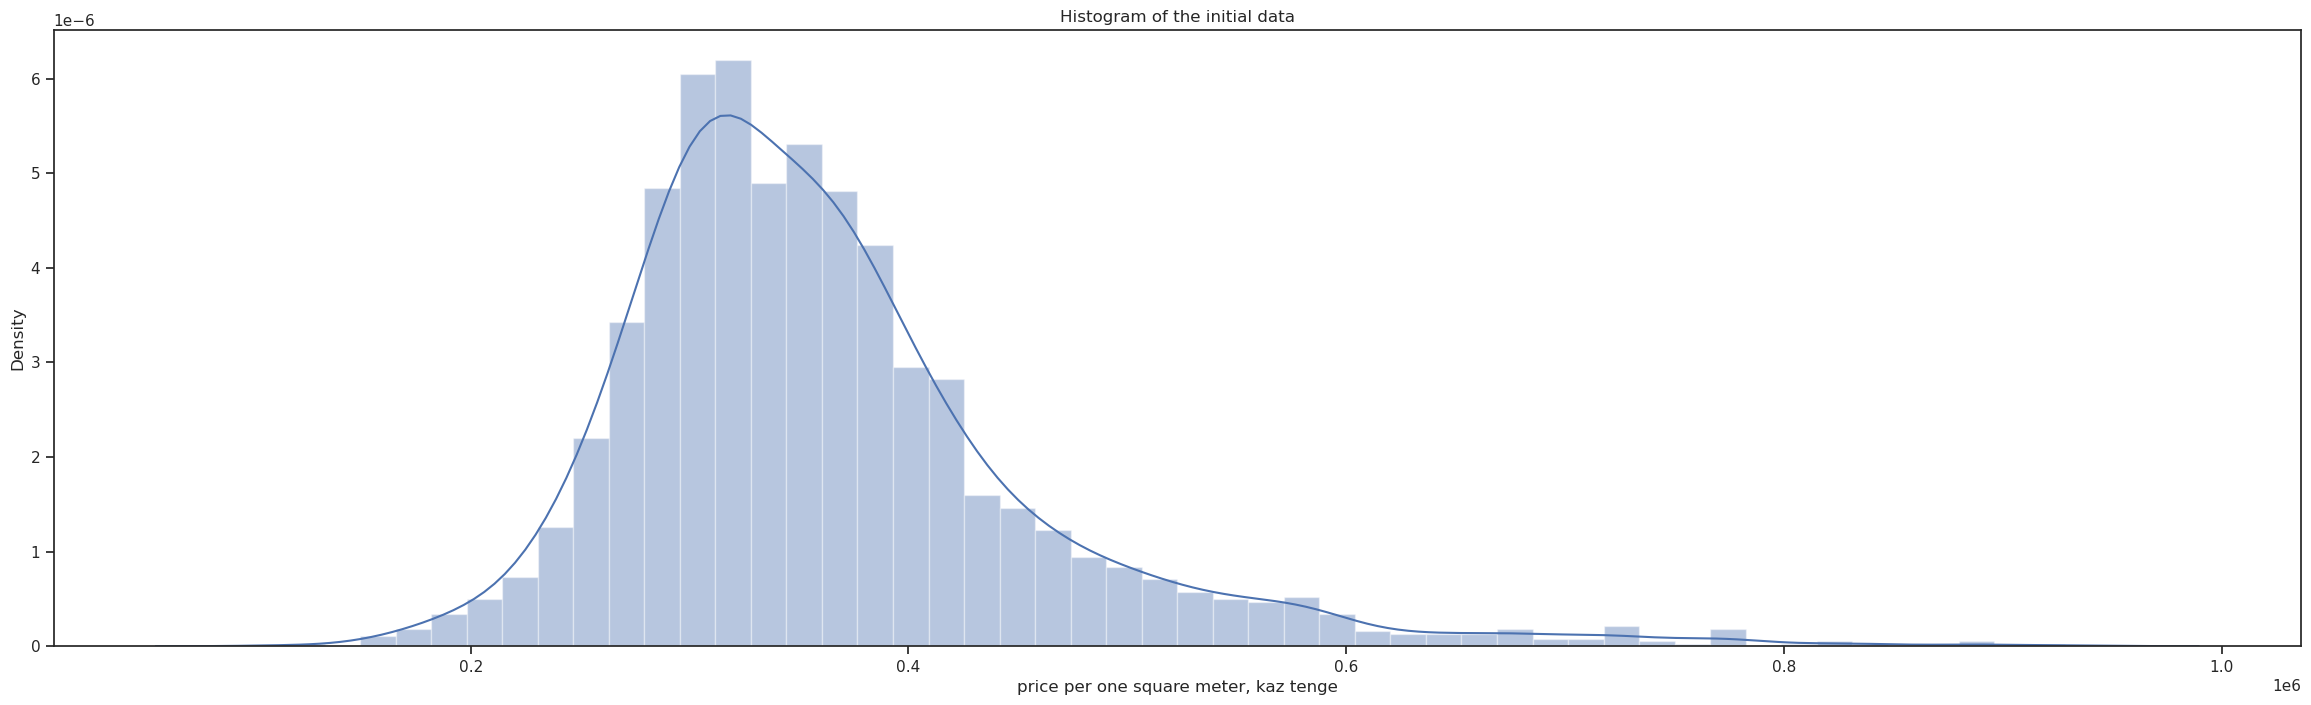

In [5]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
ax = plt.subplot(1,1,1)
sns.distplot(almatyApts['price_m'])
ax.set_xlabel('price per one square meter, kaz tenge')
ax.title.set_text('Histogram of the initial data')
plt.show()

Step 5: calculate the values of both boundaries

In [6]:
UpBoundZ = almatyApts['price_m'].mean() + 3*almatyApts['price_m'].std()
LoBoundZ = almatyApts['price_m'].mean() - 3*almatyApts['price_m'].std()
print("The upper boundary is", UpBoundZ)
print("The lower boundary is", LoBoundZ)

The upper boundary is 649395.6265495487
The lower boundary is 73712.40657147043


We see that the lower bound is less than the minimum value in the dataset. Thus, the outliers are only in the right tail of the empirical distribution.

Step 6: outliers identification.

In [7]:
outliersListZ = almatyApts[(almatyApts['price_m'] > UpBoundZ) | (almatyApts['price_m'] < LoBoundZ)]
StatsOutliersZ = outliersListZ["price_m"].describe()
print(StatsOutliersZ)

count        43.000000
mean     737249.046512
std       66137.416560
min      653846.000000
25%      684188.000000
50%      720588.000000
75%      771665.000000
max      928571.000000
Name: price_m, dtype: float64


We found that 43 observations were outliers. All of them are in the right tail of the empirical distribution. Let's plot a histogam of their unit price values.

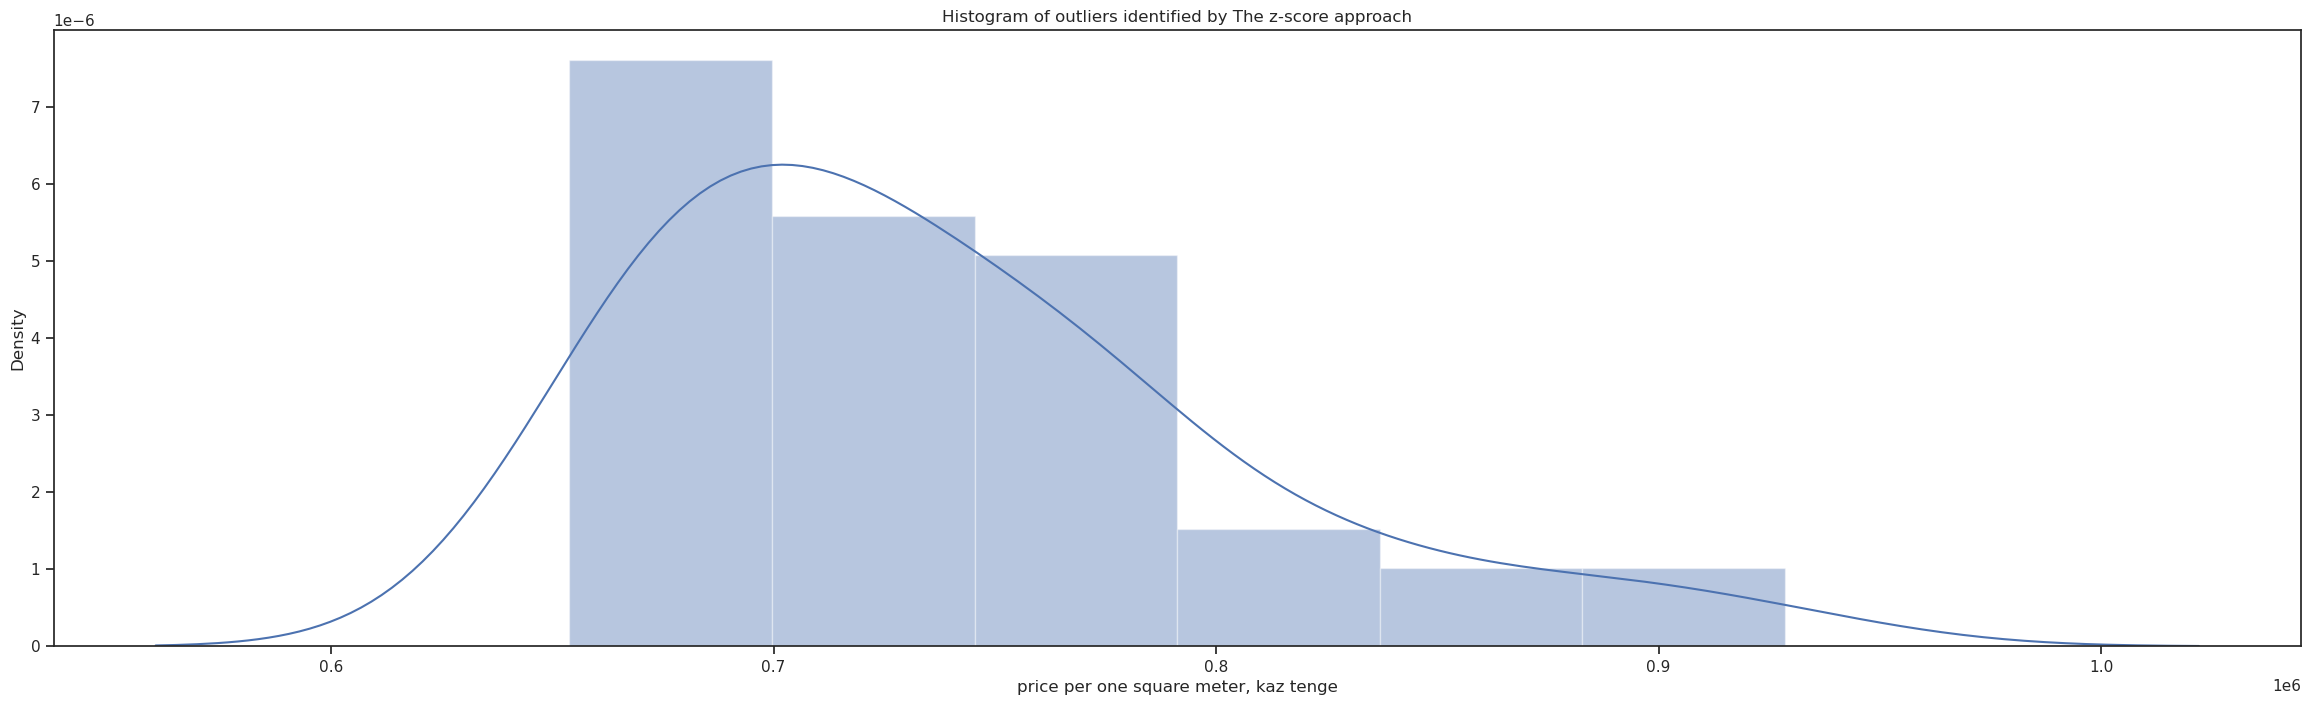

In [8]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
ax = plt.subplot(1,1,1)
sns.distplot(outliersListZ['price_m'])
ax.set_xlabel('price per one square meter, kaz tenge')
ax.title.set_text('Histogram of outliers identified by The z-score approach')
plt.show()

Let's try to apply to the dataset both trimming and vinsorization. After that, we will compare the results.

Step 7: trimming of outliers.

In [9]:
almatyAptsZTrim = almatyApts[(almatyApts['price_m'] <= UpBoundZ) & (almatyApts['price_m'] >= LoBoundZ)]
StatsTrimZ = almatyAptsZTrim["price_m"].describe()
print(StatsTrimZ)

count      2312.000000
mean     354566.608997
std       81379.022681
min      117000.000000
25%      300000.000000
50%      342857.000000
75%      394759.750000
max      649351.000000
Name: price_m, dtype: float64


Let's plot a histogram of trimmed data.

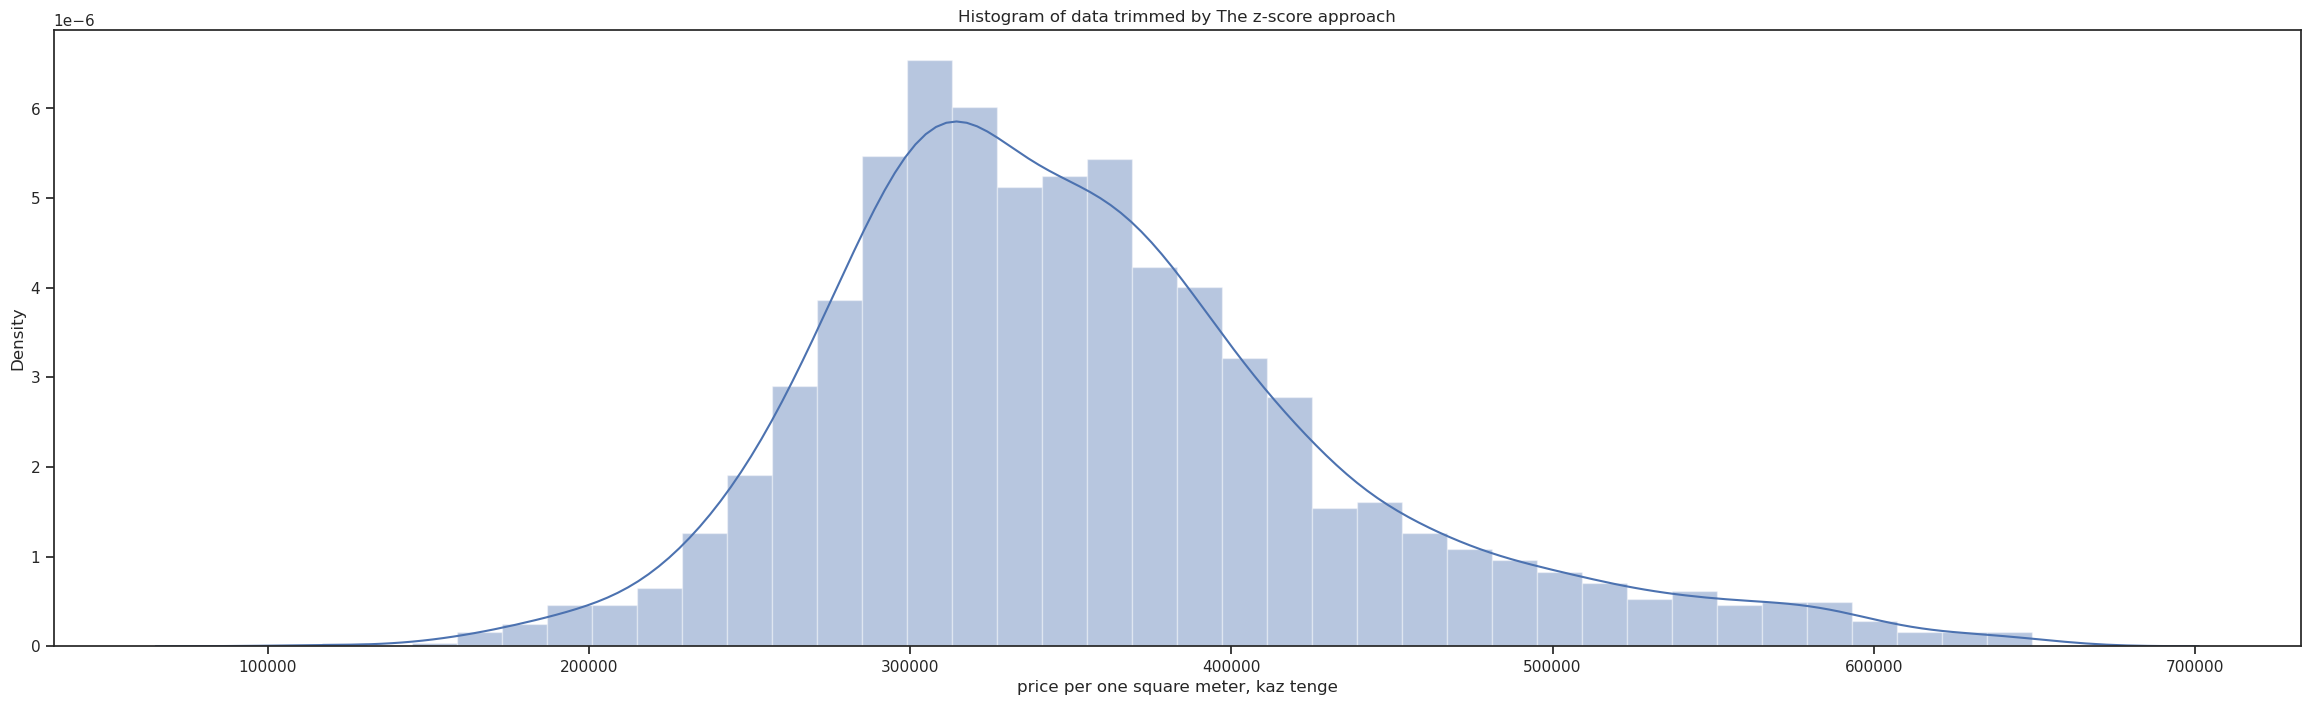

In [10]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
ax = plt.subplot(1,1,1)
sns.distplot(almatyAptsZTrim['price_m'])
ax.set_xlabel('price per one square meter, kaz tenge')
ax.title.set_text('Histogram of data trimmed by The z-score approach')
plt.show()

Step 8: winsorization.

In [11]:
almatyApts['price_m_zw'] = np.where(
    almatyApts['price_m'] > UpBoundZ,
    UpBoundZ,
    np.where(
        almatyApts['price_m'] < LoBoundZ,
        LoBoundZ,
        almatyApts['price_m']
    )
)

In [12]:
StatsWinsorZ = almatyApts['price_m_zw'].describe()
print(StatsWinsorZ)

count      2355.000000
mean     359949.898914
std       89779.757996
min      117000.000000
25%      300000.000000
50%      344432.000000
75%      400000.000000
max      649395.626550
Name: price_m_zw, dtype: float64


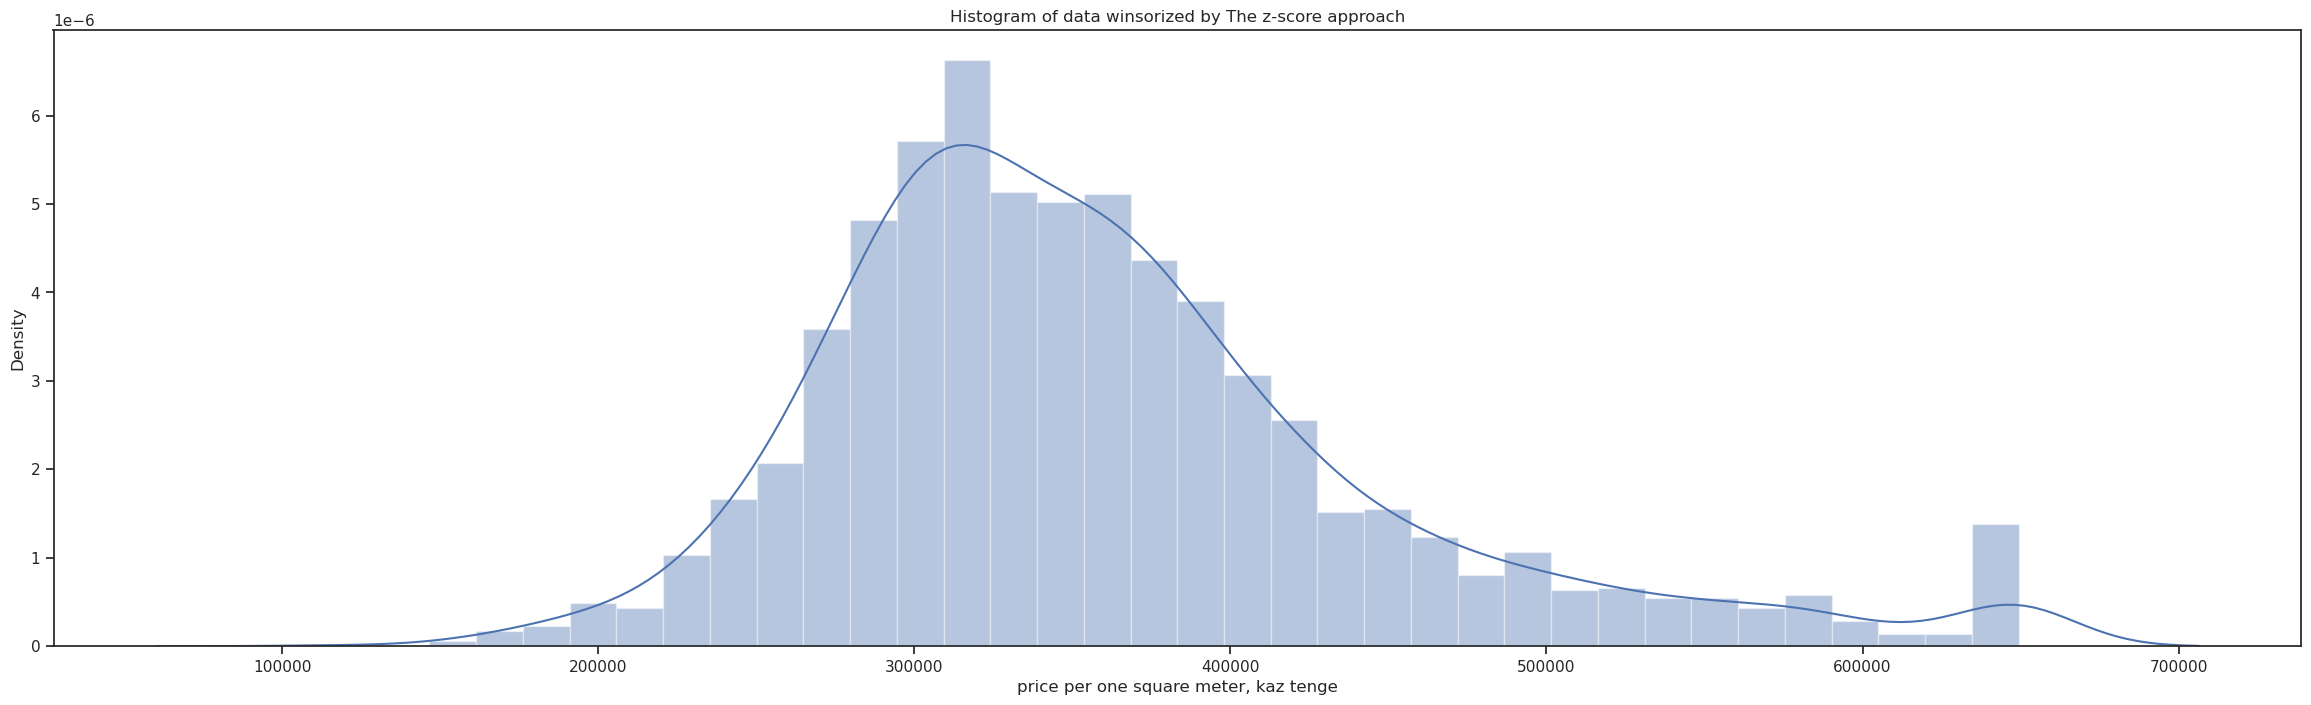

In [13]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
ax = plt.subplot(1,1,1)
sns.distplot(almatyApts['price_m_zw'])
ax.set_xlabel('price per one square meter, kaz tenge')
ax.title.set_text('Histogram of data winsorized by The z-score approach')
plt.show()

As you can see, all extreme values were equalized to the upper boundary value; and they have formed one group. 

Now we can compare the initial, trimmed and winsorized data.

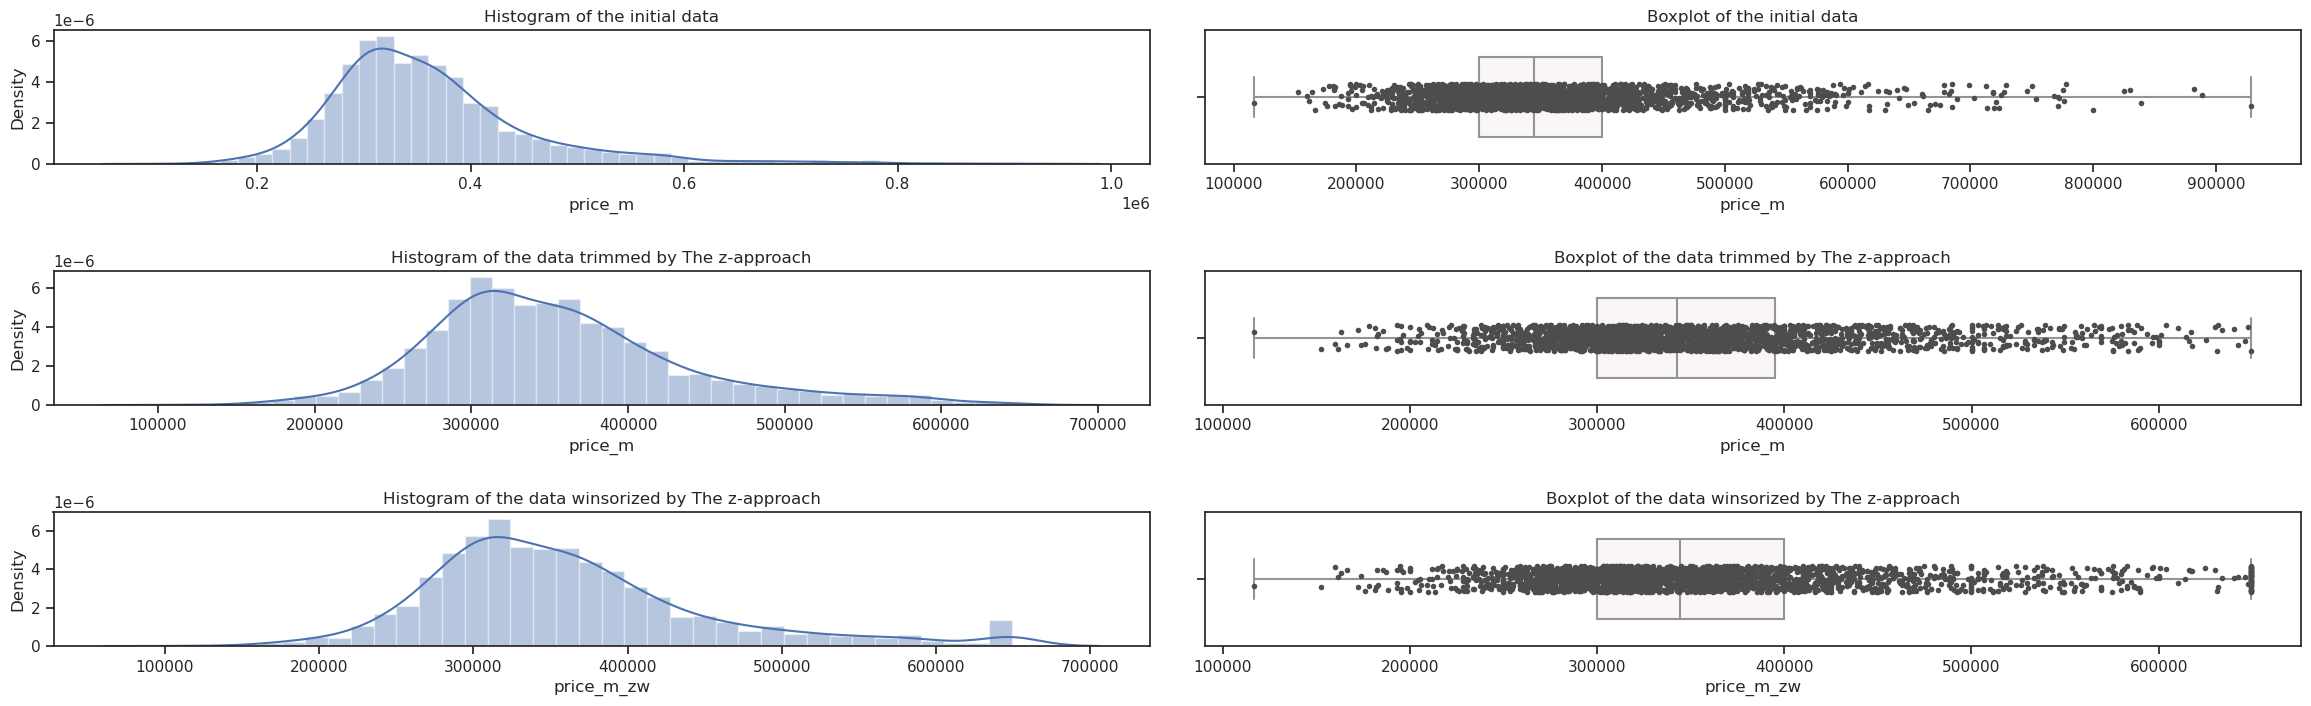

In [14]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
plt.subplots_adjust(wspace=0.05,
                    hspace=0.8)
ax1 = plt.subplot(3,2,1)
sns.distplot(almatyApts['price_m'])
ax2 = plt.subplot(3,2,2)
sns.boxplot(data=almatyApts, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax3 = plt.subplot(3,2,3)
sns.distplot(almatyAptsZTrim['price_m'])
ax4 = plt.subplot(3,2,4)
sns.boxplot(data=almatyAptsZTrim, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyAptsZTrim, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax5 = plt.subplot(3,2,5)
sns.distplot(almatyApts['price_m_zw'])
ax6 = plt.subplot(3,2,6)
sns.boxplot(data=almatyApts, x = 'price_m_zw', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m_zw',
              size=4, color=".3", linewidth=0)
ax3 = plt.subplot(3,2,3)
ax1.title.set_text('Histogram of the initial data')
ax2.title.set_text('Boxplot of the initial data')
ax3.title.set_text('Histogram of the data trimmed by The z-approach')
ax4.title.set_text('Boxplot of the data trimmed by The z-approach')
ax5.title.set_text('Histogram of the data winsorized by The z-approach')
ax6.title.set_text('Boxplot of the data winsorized by The z-approach')
plt.show()

### Tukey's fences
This approach is preferable when we deal with a skewed distribution. The first four steps are the same as in The z-score approach.

Step 5: plot a Box&Whiskers diagram for the skewed feature.

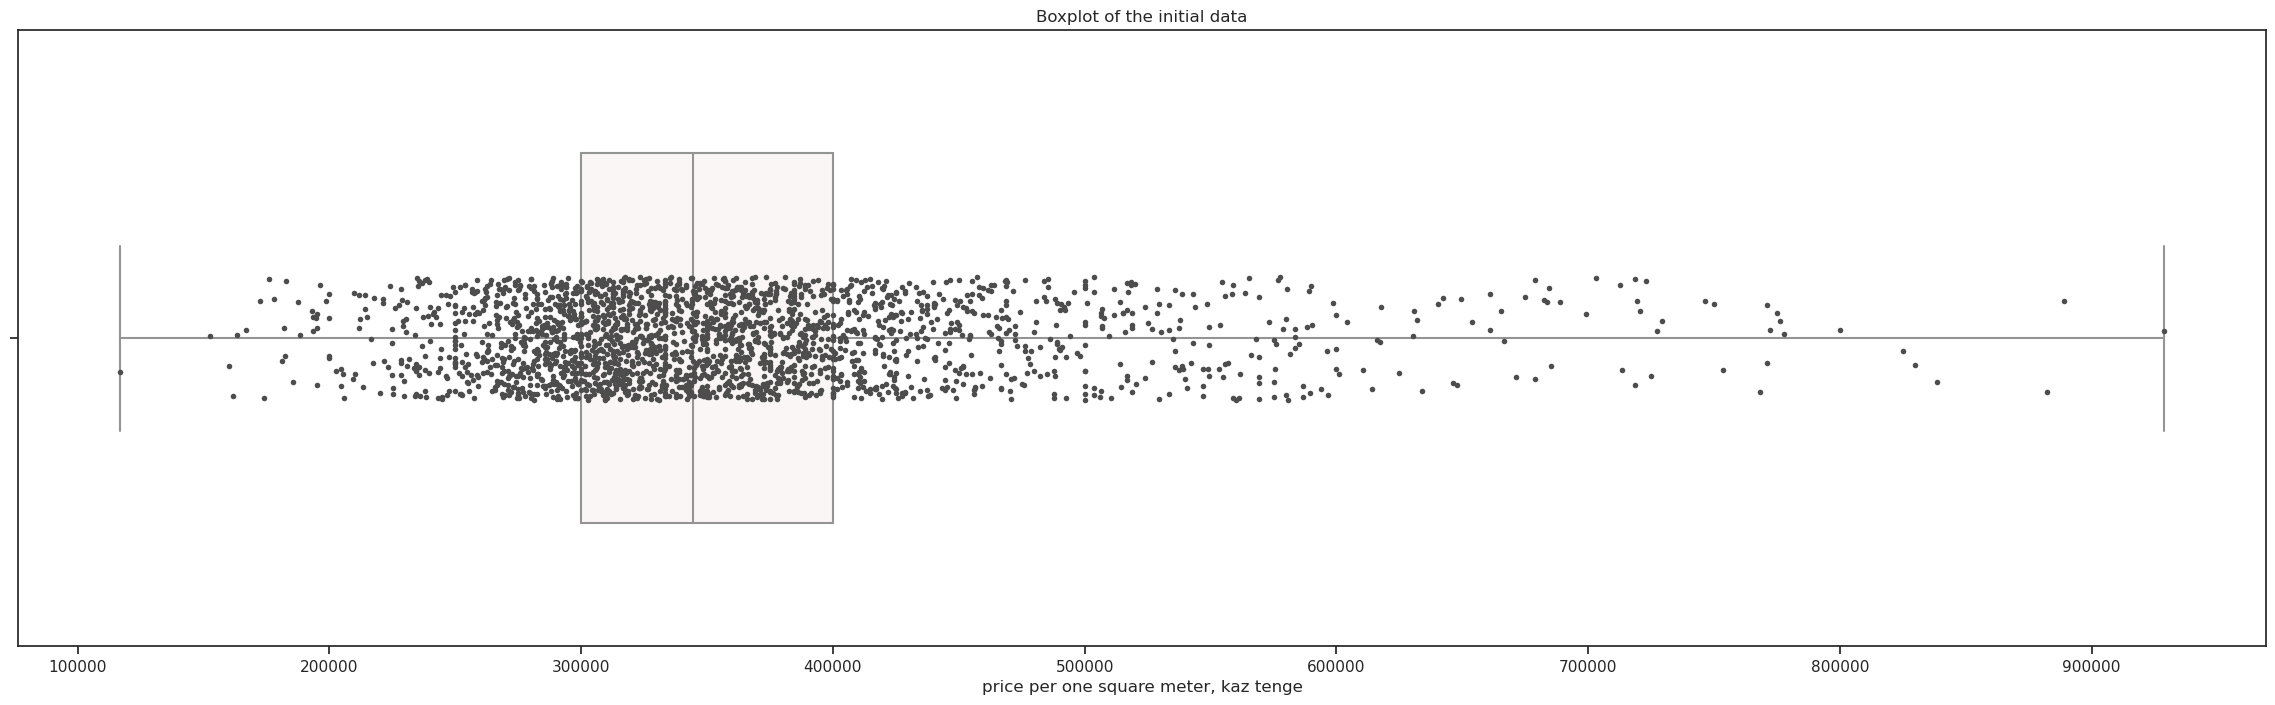

In [15]:
f, ax = plt.subplots(figsize=(29, 8))
sns.boxplot(data=almatyApts, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax.set_xlabel('price per one square meter, kaz tenge')
ax.title.set_text('Boxplot of the initial data')

Step 6: calculate 0.25th and 0.75th quantiles.

In [16]:
quantile25 = almatyApts['price_m'].quantile(0.25)
quantile75 = almatyApts['price_m'].quantile(0.75)
iqr = quantile75 - quantile25
print(quantile25)
print(quantile75)
print(iqr)

300000.0
400000.0
100000.0


Step 7: calculate the upper and lower limits.

In [17]:
UpLimT = quantile75 + 1.5 * iqr
LoLimT = quantile25 - 1.5 * iqr
print('The upper limit is', UpLimT)
print('The lower limit is', LoLimT)

The upper limit is 550000.0
The lower limit is 150000.0


Step 8: find and describe the outliers.

In [18]:
outliersListT = almatyApts[(almatyApts['price_m'] > UpLimT) | (almatyApts['price_m'] < LoLimT)]
StatsOutliersT = outliersListT['price_m'].describe()
print(StatsOutliersT)

count       115.000000
mean     639633.139130
std       98451.845579
min      117000.000000
25%      576419.500000
50%      610526.000000
75%      693907.000000
max      928571.000000
Name: price_m, dtype: float64


We found that this approach gave us more than twice outliers number relatively to Z-approach. The next difference is that now we have outliers in both tails of distribution. Thus, we will get a very strange histogram.

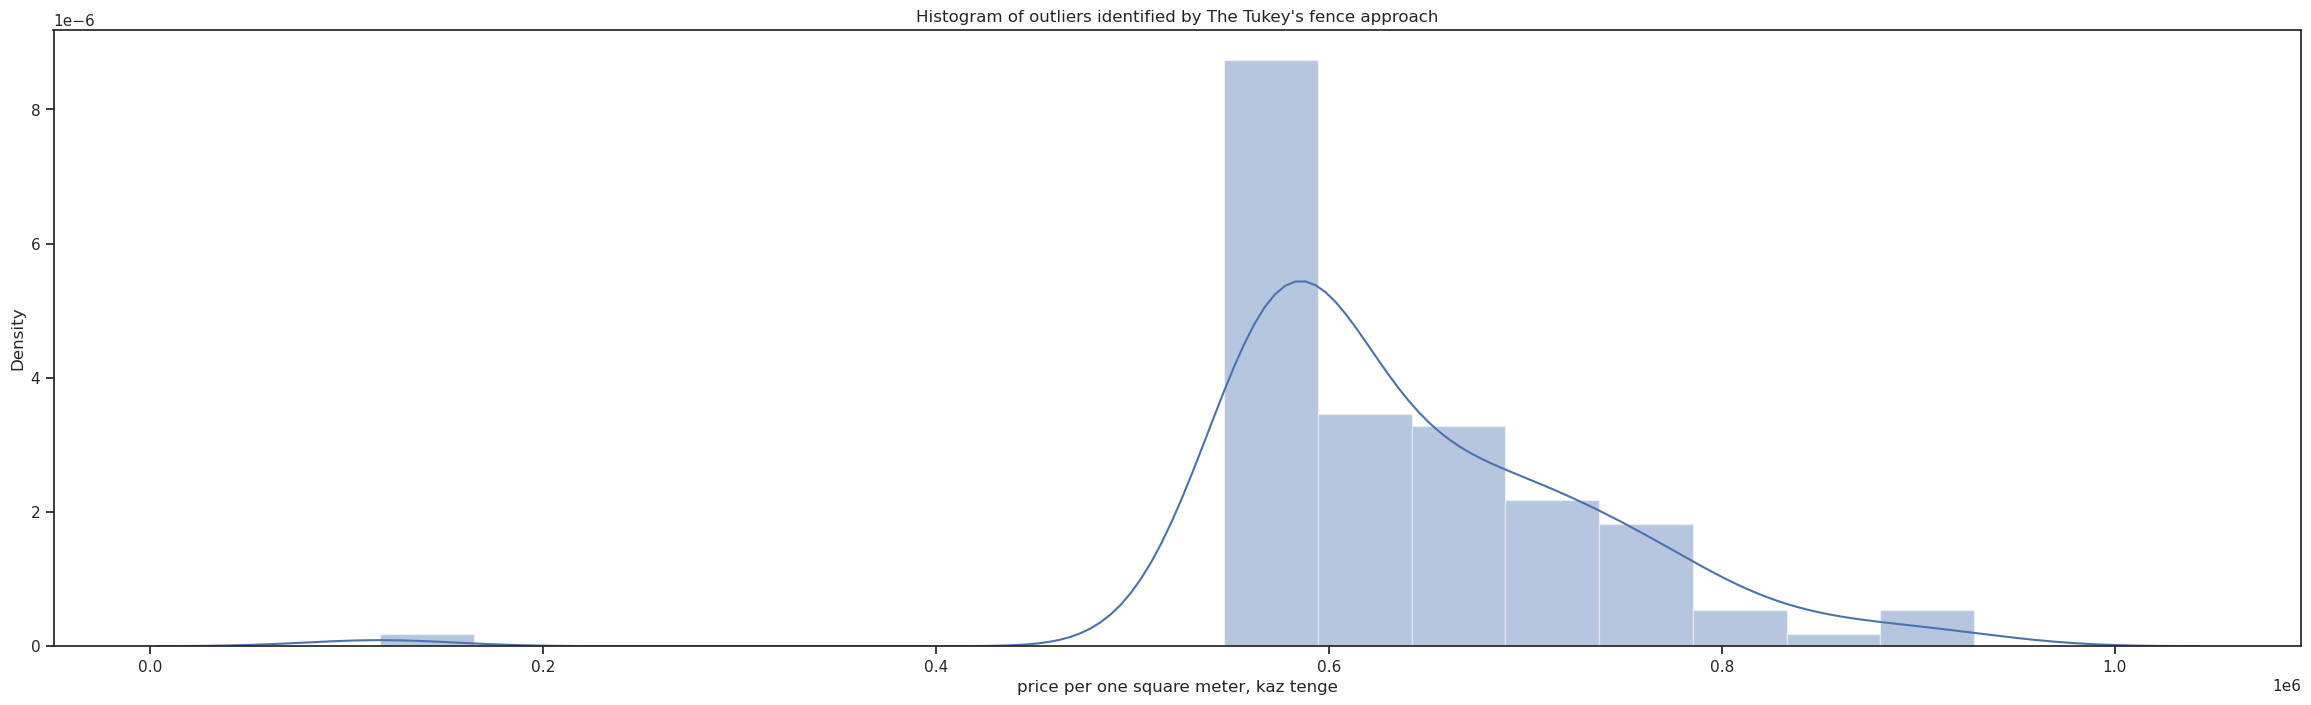

In [19]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
ax = plt.subplot(1,1,1)
sns.distplot(outliersListT['price_m'])
ax.set_xlabel('price per one square meter, kaz tenge')
ax.title.set_text('Histogram of outliers identified by The Tukey\'s fence approach')
plt.show()

Step 9: trimming of outliers.

In [20]:
almatyAptsTTrim = almatyApts[(almatyApts['price_m'] <= UpLimT) & (almatyApts['price_m'] >= LoLimT)]
StatsTrimT = almatyAptsTTrim["price_m"].describe()
print(StatsTrimT)

count      2240.000000
mean     347277.633036
std       70778.126308
min      152542.000000
25%      298665.750000
50%      338983.000000
75%      388396.250000
max      549451.000000
Name: price_m, dtype: float64


Let's plot a histogram of trimmed data

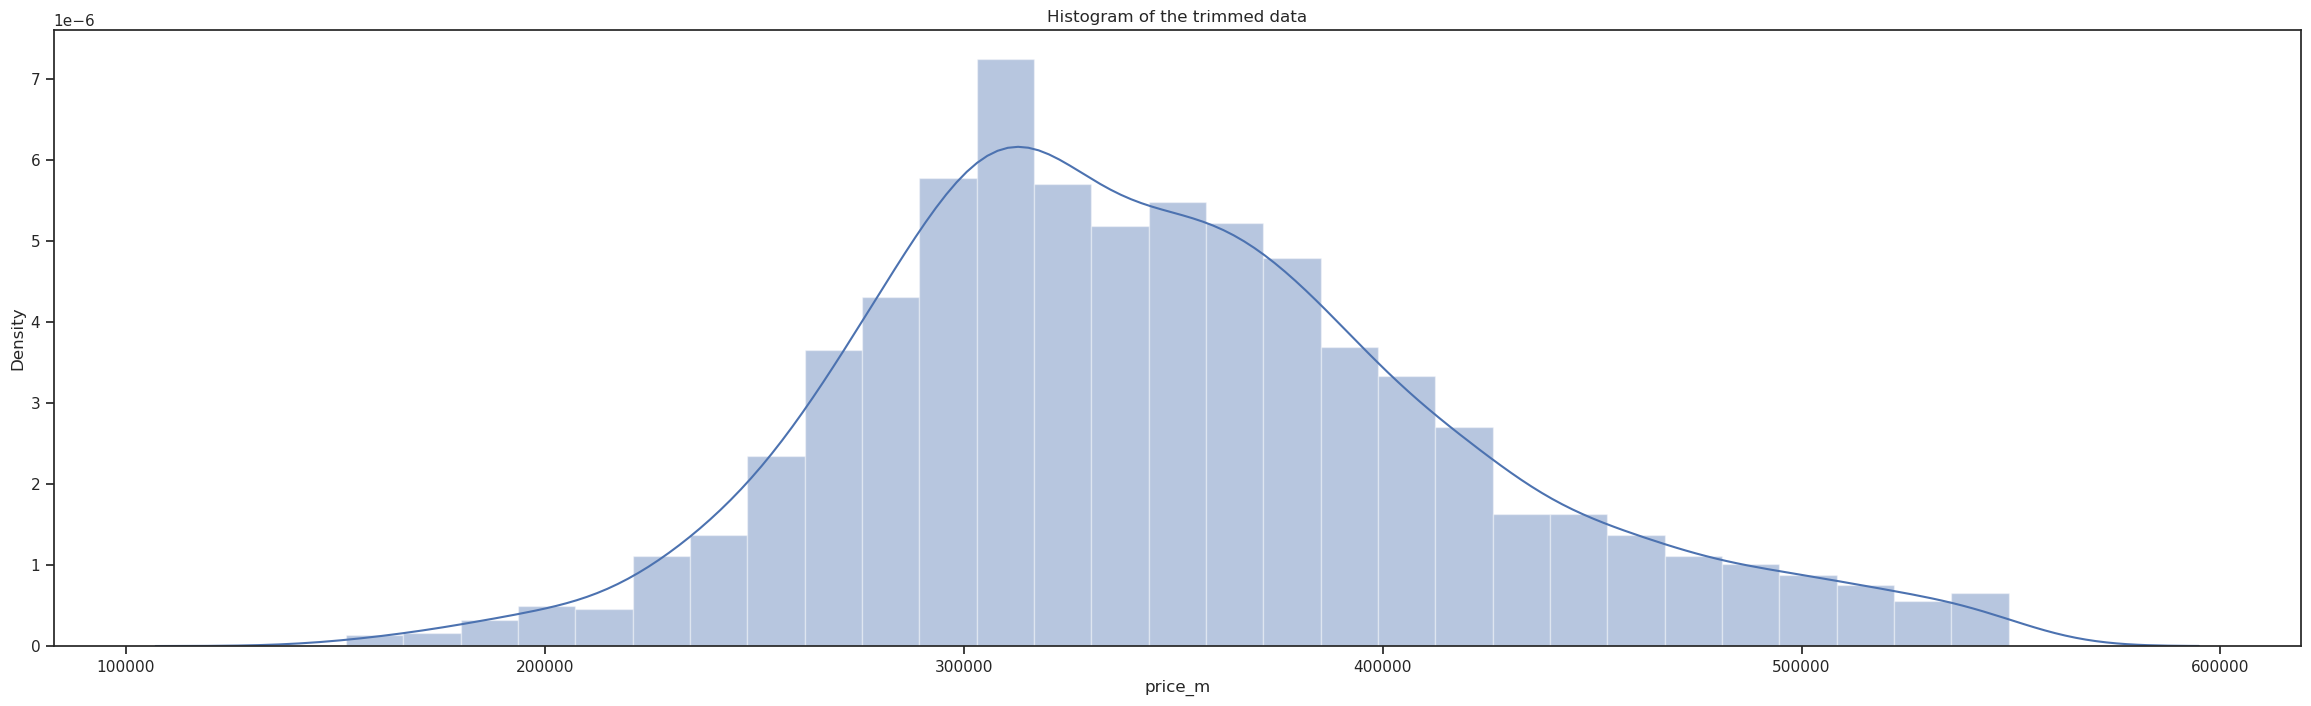

In [21]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
ax1 = plt.subplot(1,1,1)
sns.distplot(almatyAptsTTrim['price_m'])
ax1.title.set_text('Histogram of the trimmed data')
plt.show()

Step 10: winsorization.

In [22]:
almatyApts['price_m_tw'] = np.where(
    almatyApts['price_m'] > UpLimT,
    UpLimT,
    np.where(
        almatyApts['price_m'] < LoLimT,
        LoLimT,
        almatyApts['price_m']
    )
)

In [23]:
StatsWinsorT = almatyApts['price_m_tw'].describe()
print(StatsWinsorT)

count      2355.000000
mean     357007.175372
std       81712.076941
min      150000.000000
25%      300000.000000
50%      344432.000000
75%      400000.000000
max      550000.000000
Name: price_m_tw, dtype: float64


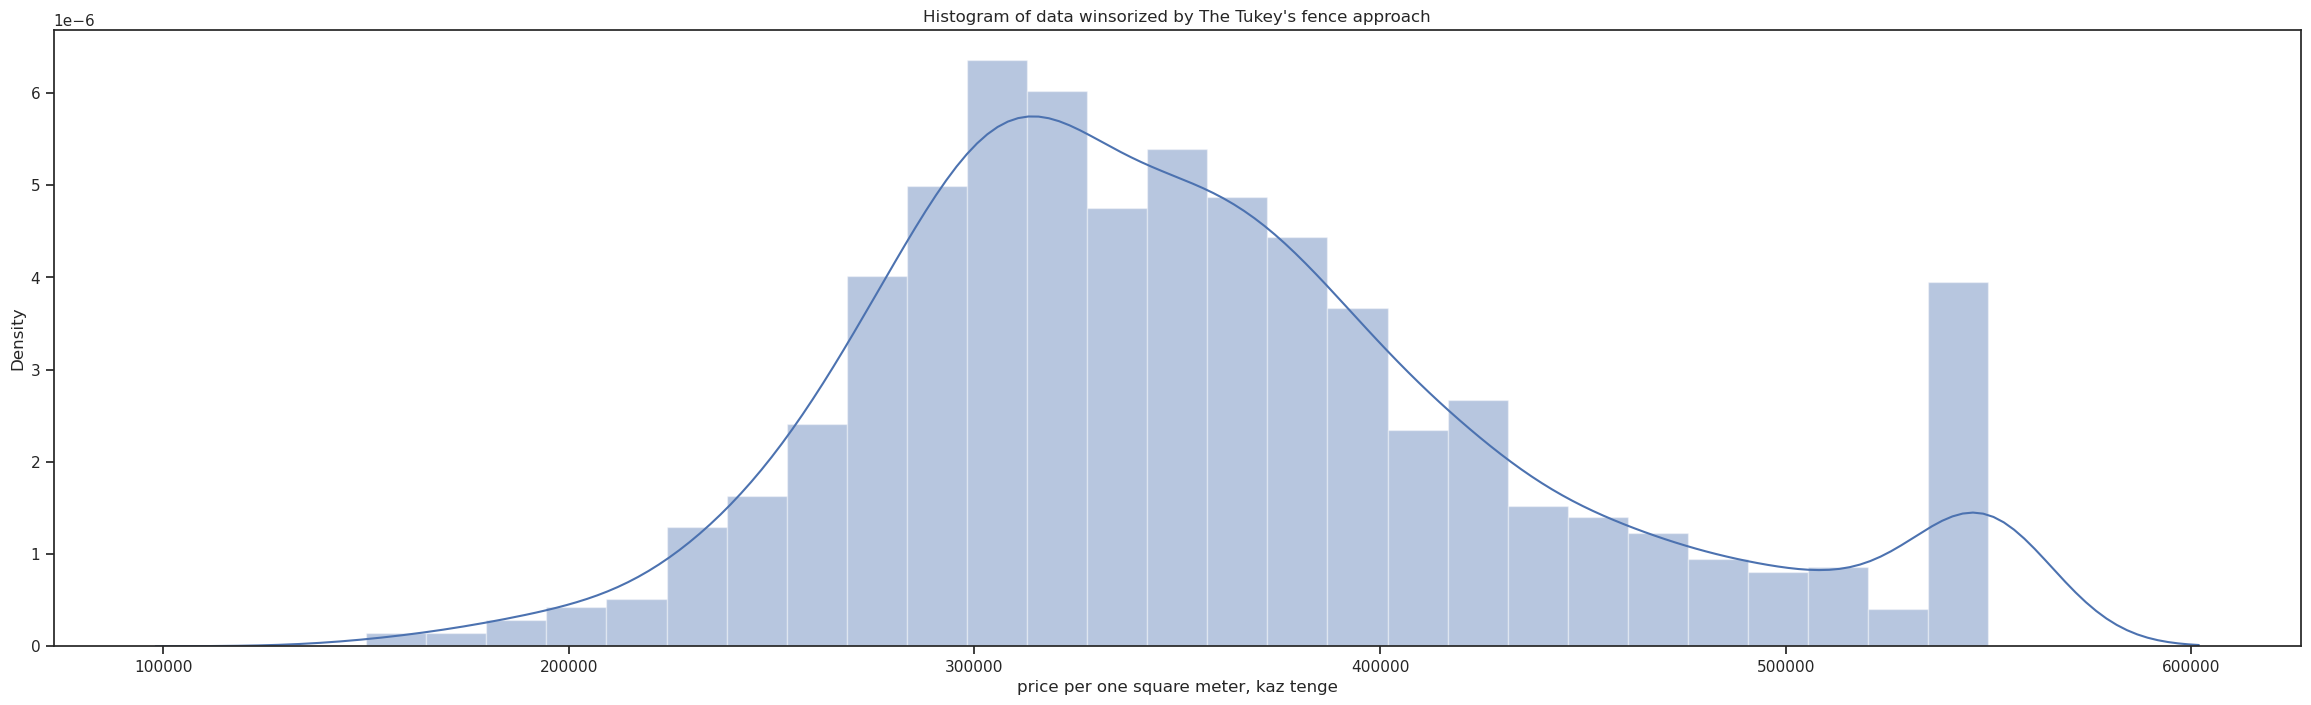

In [24]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
ax = plt.subplot(1,1,1)
sns.distplot(almatyApts['price_m_tw'])
ax.set_xlabel('price per one square meter, kaz tenge')
ax.title.set_text('Histogram of data winsorized by The Tukey\'s fence approach')
plt.show()

As you can see, all extreme values were also equalized to the upper boundary value; and they have formed one group which now is rather heavy. 

Let's compare the initial, trimmed and winsorized data.

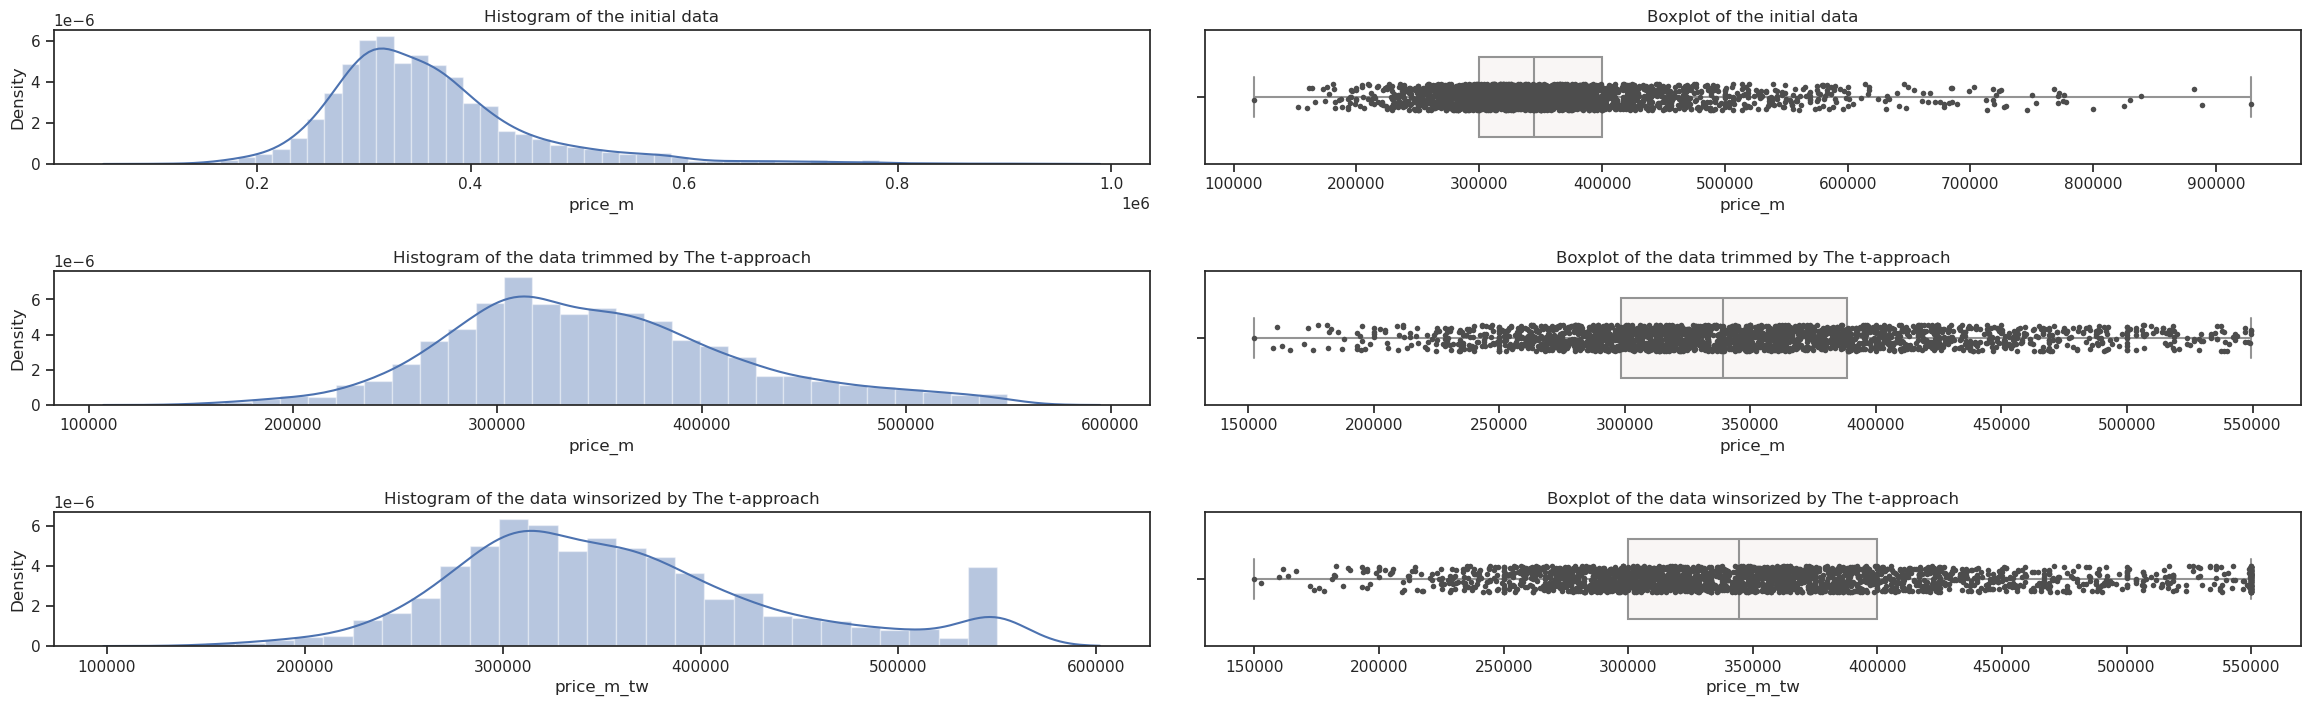

In [36]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
plt.subplots_adjust(wspace=0.05,
                    hspace=0.8)
ax1 = plt.subplot(3,2,1)
sns.distplot(almatyApts['price_m'])
ax2 = plt.subplot(3,2,2)
sns.boxplot(data=almatyApts, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax3 = plt.subplot(3,2,3)
sns.distplot(almatyAptsTTrim['price_m'])
ax4 = plt.subplot(3,2,4)
sns.boxplot(data=almatyAptsTTrim, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyAptsTTrim, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax5 = plt.subplot(3,2,5)
sns.distplot(almatyApts['price_m_tw'])
ax6 = plt.subplot(3,2,6)
sns.boxplot(data=almatyApts, x = 'price_m_tw', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m_tw',
              size=4, color=".3", linewidth=0)
ax1.title.set_text('Histogram of the initial data')
ax2.title.set_text('Boxplot of the initial data')
ax3.title.set_text('Histogram of the data trimmed by The t-approach')
ax4.title.set_text('Boxplot of the data trimmed by The t-approach')
ax5.title.set_text('Histogram of the data winsorized by The t-approach')
ax6.title.set_text('Boxplot of the data winsorized by The t-approach')
plt.show()

### The quantile-based approach
This approach should be suitable when we deal to unknown distribution. Its technique works by setting a particular threshold value, which decides based on our problem statement. The key assumption lays into the fact that we always maintain a symmetry. It means that if we remove $1\,\%$ from the right tail, we also drop by $1\,\%$  in the left one. The first four steps are the same as in the previous two subsections.

Step 5: calculate the upper and the lower limits.

In [26]:
treshold = 0.01
UpLimQ = almatyApts['price_m'].quantile(1-treshold)
LoLimQ = almatyApts['price_m'].quantile(treshold)
print('The upper limit is', UpLimQ)
print('The lower limit is', LoLimQ)

The upper limit is 718750.0
The lower limit is 195881.13999999998


Step 6: find and describe the outliers.

In [27]:
outliersListQ = almatyApts[(almatyApts['price_m'] > UpLimQ) | (almatyApts['price_m'] < LoLimQ)]
StatsOutliersQ = outliersListQ['price_m'].describe()
print(StatsOutliersQ)

count        47.000000
mean     473841.978723
std      308406.127848
min      117000.000000
25%      182085.500000
50%      195238.000000
75%      771053.000000
max      928571.000000
Name: price_m, dtype: float64


As you can see, we got approximately as many outliers as in The z-approach. Due to aforementioned assumption, we got outliers from both tails. Thus, a histogram will show a bimodal distribution of outliers.

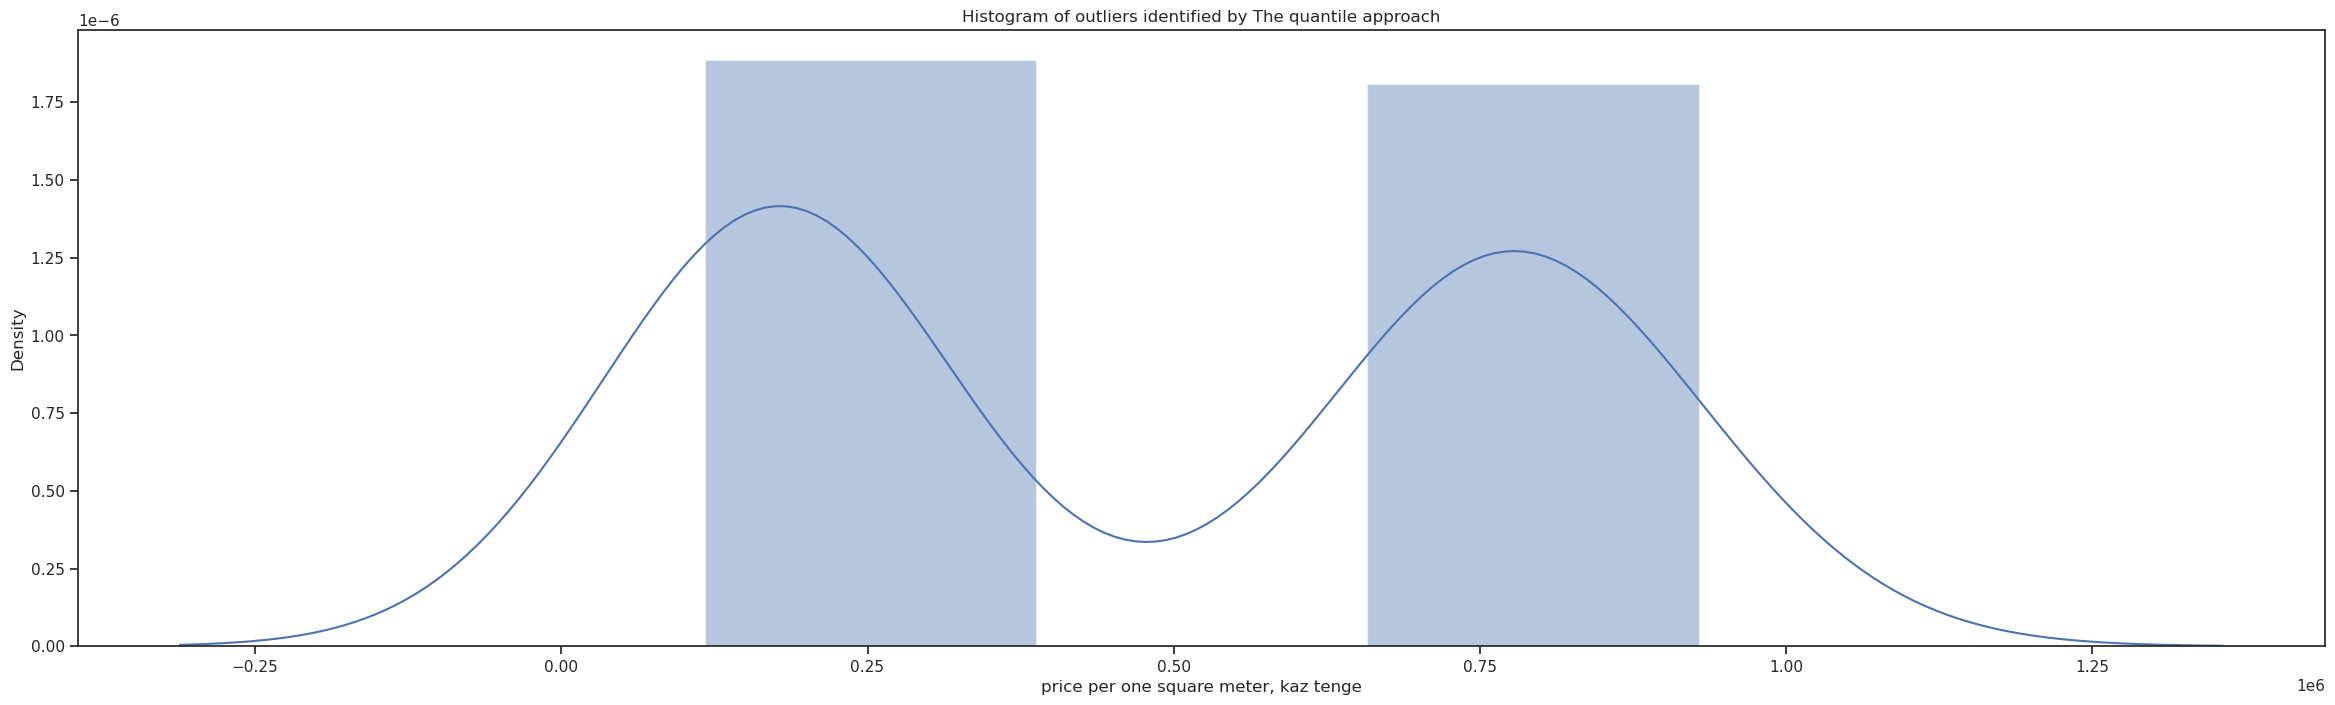

In [28]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
ax = plt.subplot(1,1,1)
sns.distplot(outliersListQ['price_m'])
ax.set_xlabel('price per one square meter, kaz tenge')
ax.title.set_text('Histogram of outliers identified by The quantile approach')
plt.show()

Step 7: trimming the outliers.

In [29]:
almatyAptsQTrim = almatyApts[(almatyApts['price_m'] <= UpLimQ) & (almatyApts['price_m'] >= LoLimQ)]
StatsTrimQ = almatyAptsQTrim["price_m"].describe()
print(StatsTrimQ)

count      2308.000000
mean     359267.389948
std       85057.611260
min      196429.000000
25%      301724.000000
50%      344438.000000
75%      397727.000000
max      718750.000000
Name: price_m, dtype: float64


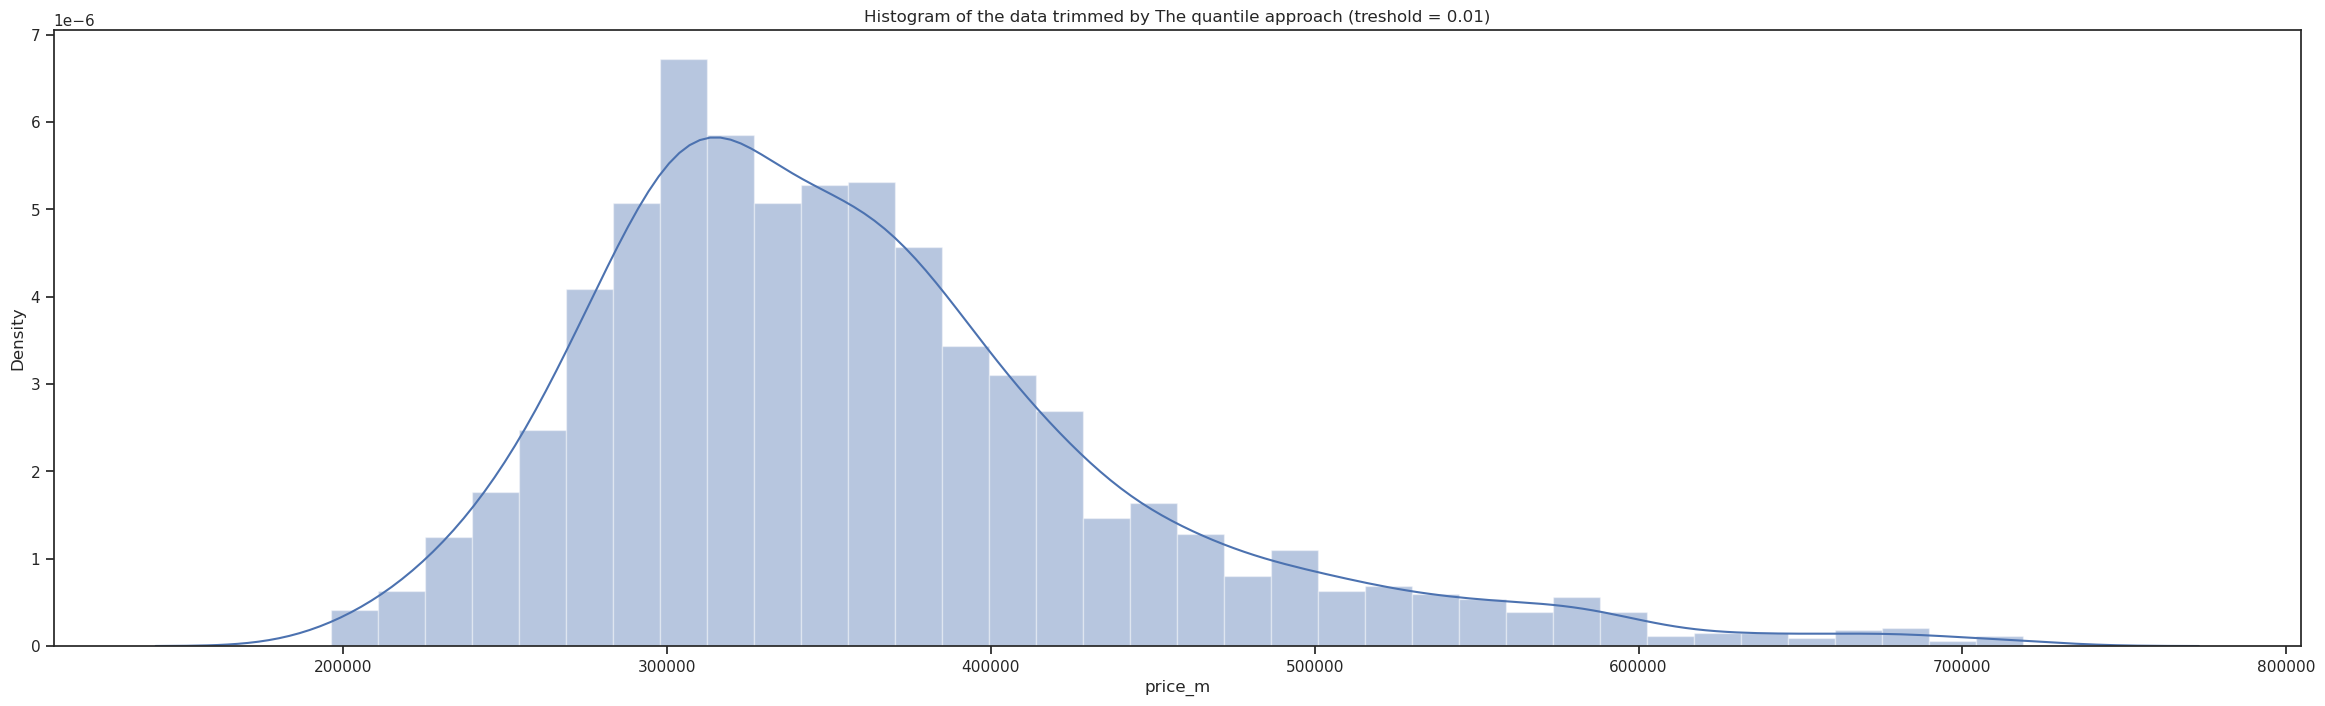

In [30]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
ax1 = plt.subplot(1,1,1)
sns.distplot(almatyAptsQTrim['price_m'])
ax1.title.set_text('Histogram of the data trimmed by The quantile approach (treshold = 0.01)')
plt.show()

Step 8: winsorization.

In [31]:
almatyApts['price_m_qw'] = np.where(
    almatyApts['price_m'] > UpLimQ,
    UpLimQ,
    np.where(
        almatyApts['price_m'] < LoLimQ,
        LoLimQ,
        almatyApts['price_m']
    )
)

In [32]:
StatsWinsorQ = almatyApts['price_m_qw'].describe()
print(StatsWinsorQ)

count      2355.000000
mean     361113.177648
std       92853.319961
min      195881.140000
25%      300000.000000
50%      344432.000000
75%      400000.000000
max      718750.000000
Name: price_m_qw, dtype: float64


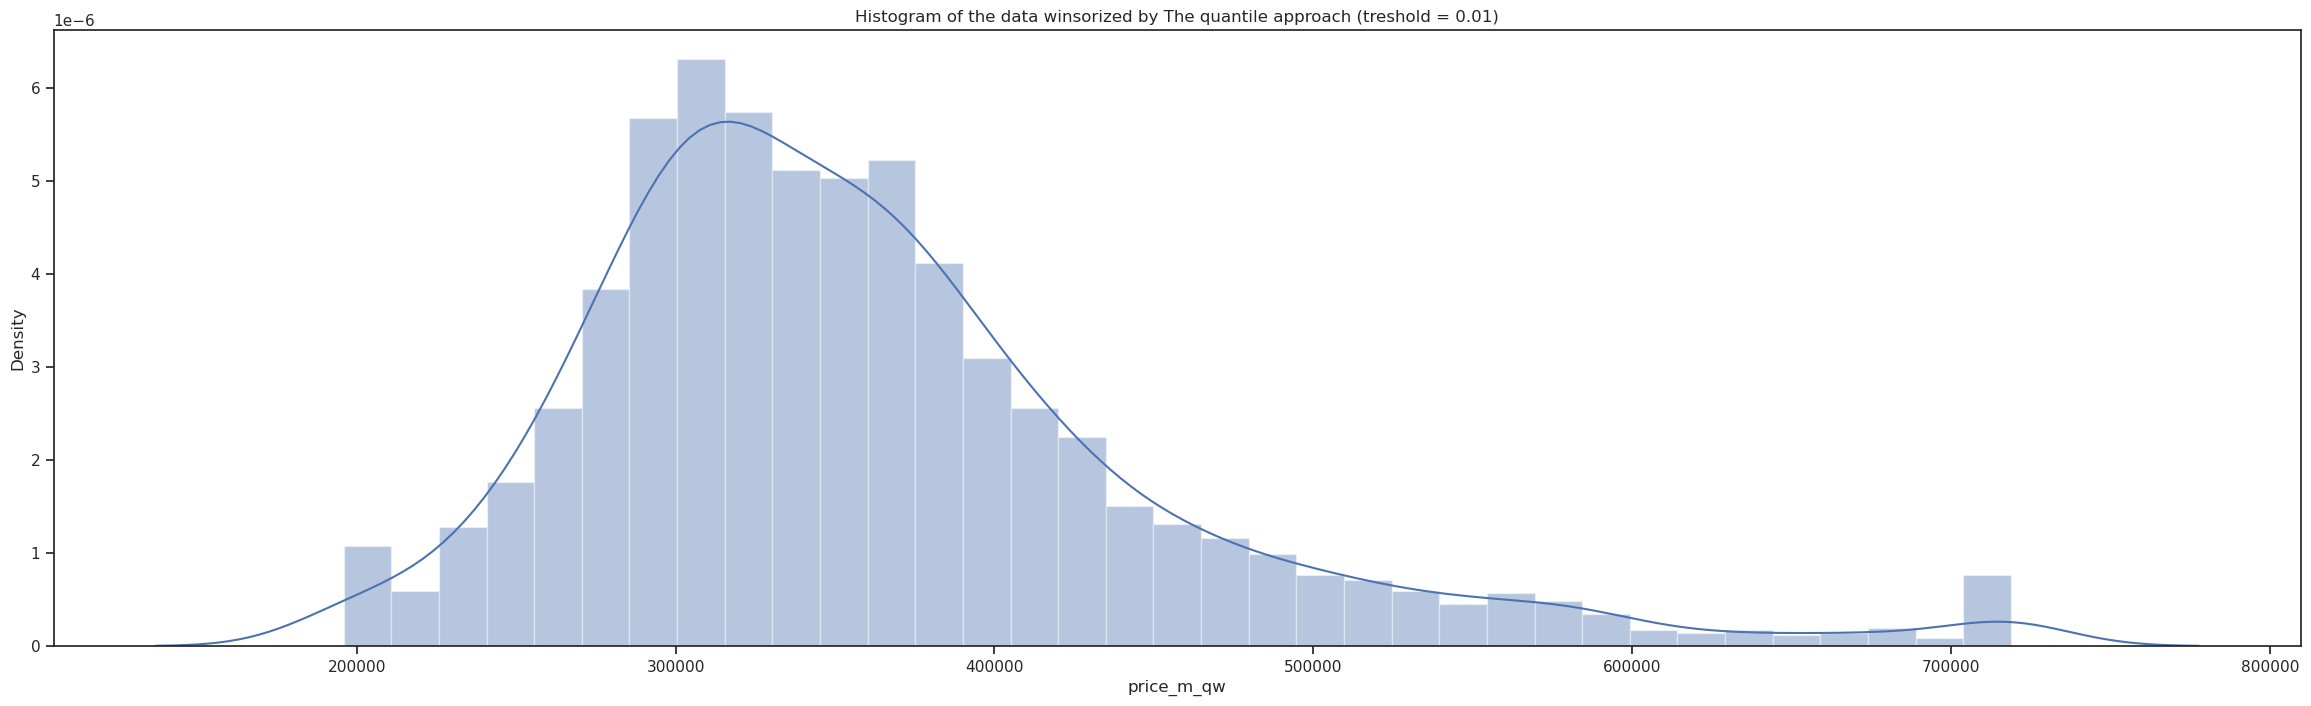

In [33]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
ax1 = plt.subplot(1,1,1)
sns.distplot(almatyApts['price_m_qw'])
ax1.title.set_text('Histogram of the data winsorized by The quantile approach (treshold = 0.01)')
plt.show()

The comparison of the initial, trimmed and winsorized data.

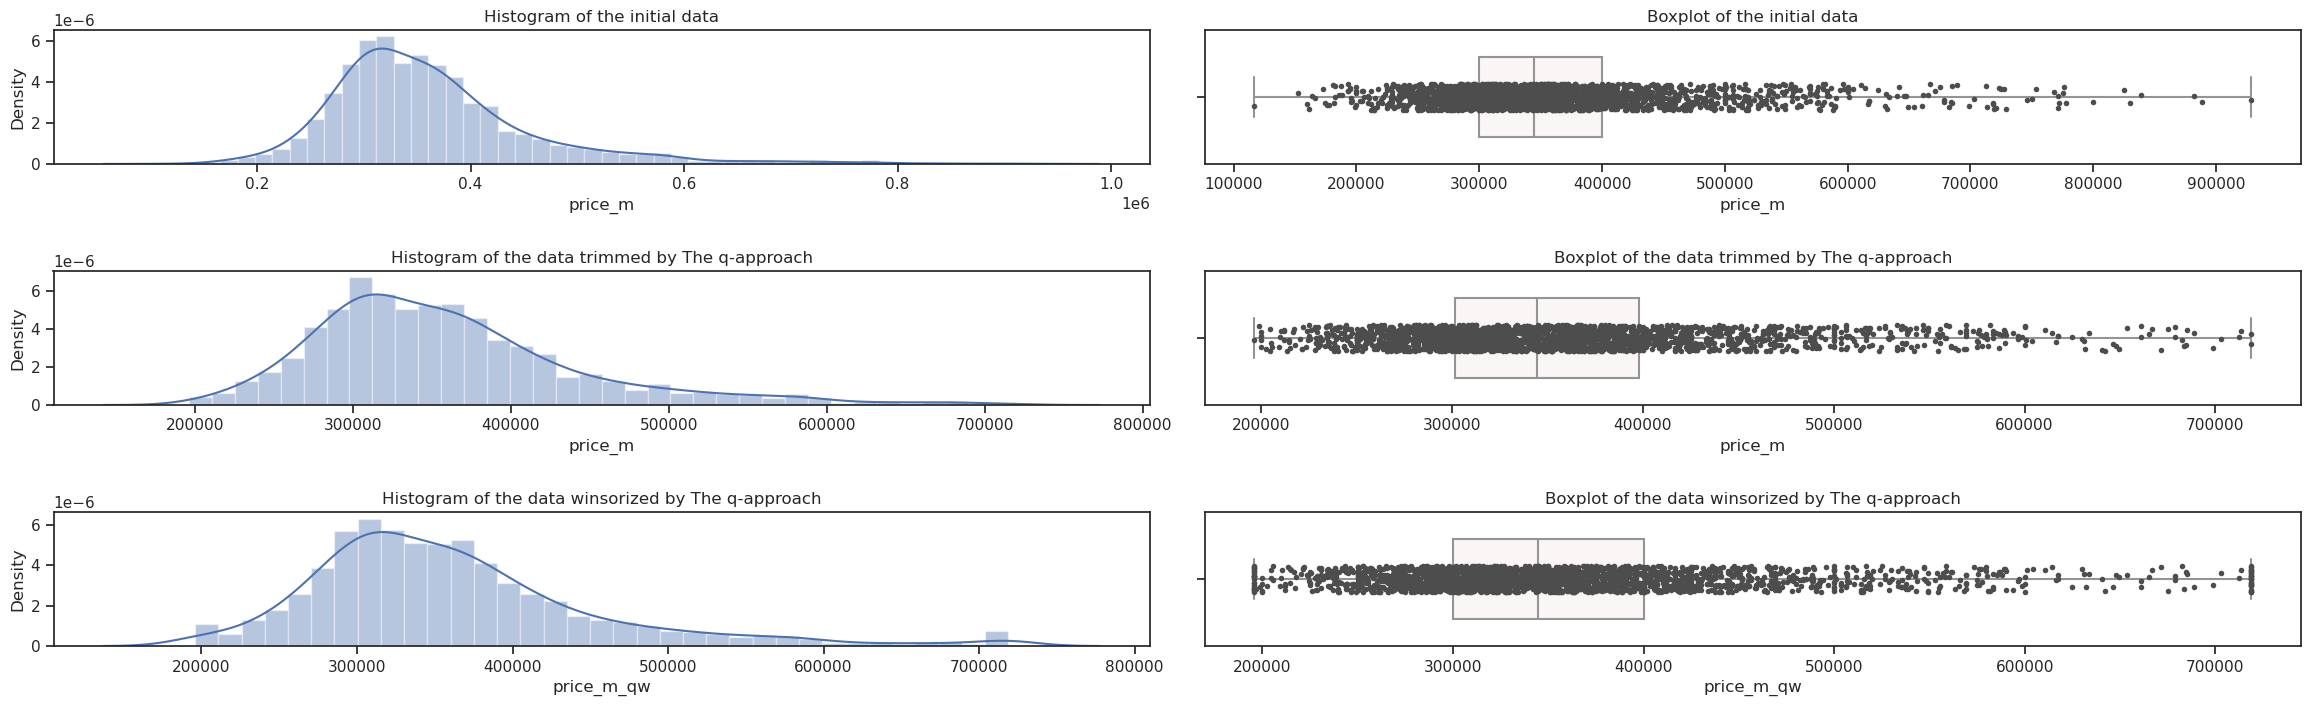

In [35]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,8))
plt.subplots_adjust(wspace=0.05,
                    hspace=0.8)
ax1 = plt.subplot(3,2,1)
sns.distplot(almatyApts['price_m'])
ax2 = plt.subplot(3,2,2)
sns.boxplot(data=almatyApts, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax3 = plt.subplot(3,2,3)
sns.distplot(almatyAptsQTrim['price_m'])
ax4 = plt.subplot(3,2,4)
sns.boxplot(data=almatyAptsQTrim, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyAptsQTrim, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax5 = plt.subplot(3,2,5)
sns.distplot(almatyApts['price_m_qw'])
ax6 = plt.subplot(3,2,6)
sns.boxplot(data=almatyApts, x = 'price_m_qw', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m_qw',
              size=4, color=".3", linewidth=0)
ax1.title.set_text('Histogram of the initial data')
ax2.title.set_text('Boxplot of the initial data')
ax3.title.set_text('Histogram of the data trimmed by The q-approach')
ax4.title.set_text('Boxplot of the data trimmed by The q-approach')
ax5.title.set_text('Histogram of the data winsorized by The q-approach')
ax6.title.set_text('Boxplot of the data winsorized by The q-approach')
plt.show()

### Comparison of the results got from three approaches
It's not fair to say that one or another approach is the best at all. The choice should depend on the distribution shape and valuation purposes. I can only say that the most common situation in open markets (at least in The Northern Eurasia) is the heavy right tail, processing of which is the important task. At the same time, heavy left tail may occur due to some specific challenges in the questions of rights to a specific property.

Relatively to the methods of processing of outliers, it is reasonable to say that choice should depend firstly on the further type of modelling. Let's consider advantages and disadvantages of each method and assume the most suitable, depending on further modelling. 

| Method | Key advantages | Key disasdantages | Intended model type |
| :- | :- | :- | :- |
|Retention| It keeeps all market information | May cause a biased estimation in the case of presence of the data points belonging to another distribution | Machine learning methods based on The Bayesian approach to the concept of probability |
| Truncation | It eliminates the problem of outliers at all and simplify the shape of distribution, making it more suitable for further transformations | It causes losing part of market data which reflecting an objective picture of the open market. The mere fact that there are extreme values does not mean that such observations exist outside the context of the market | Methods of the traditional statistics based on The Frequentist approach to the concept of probability |
| Winsorization | It provides such a compromise between keeping all data points and avoiding of biased estimators that makes possible the implementations of many models. In practice, it also could be useful in designing some recommendation systems, which can be applicable in the collateral lending in particular in the mortgage secured lending as well as in insurance, taxation, etc. | It causes to arising a new shape of distribution that actually does not exist on the open market under consider | It's applicable for the both approaches to the concept of probability |
|Treatinng as missing value| It helps to avoid the problem of outliers in the case of applying methods based on The Frequentist approach to the concept of probability, but to keep all data points for the Bayesian-based methods | It keeps all challenges which are specific for trimming or retention depending on model that would be chosen further | It's applicable for the both approaches to the concept of probability and allows switching between them |

Since this paper is designed for beginner appraisers who use The Frequentist approach to the concept of probability, its focus is on two methods, which are truncation and winsorization. Let's see on histograms and boxplots got by applying different approaches and methods.

**Truncation**

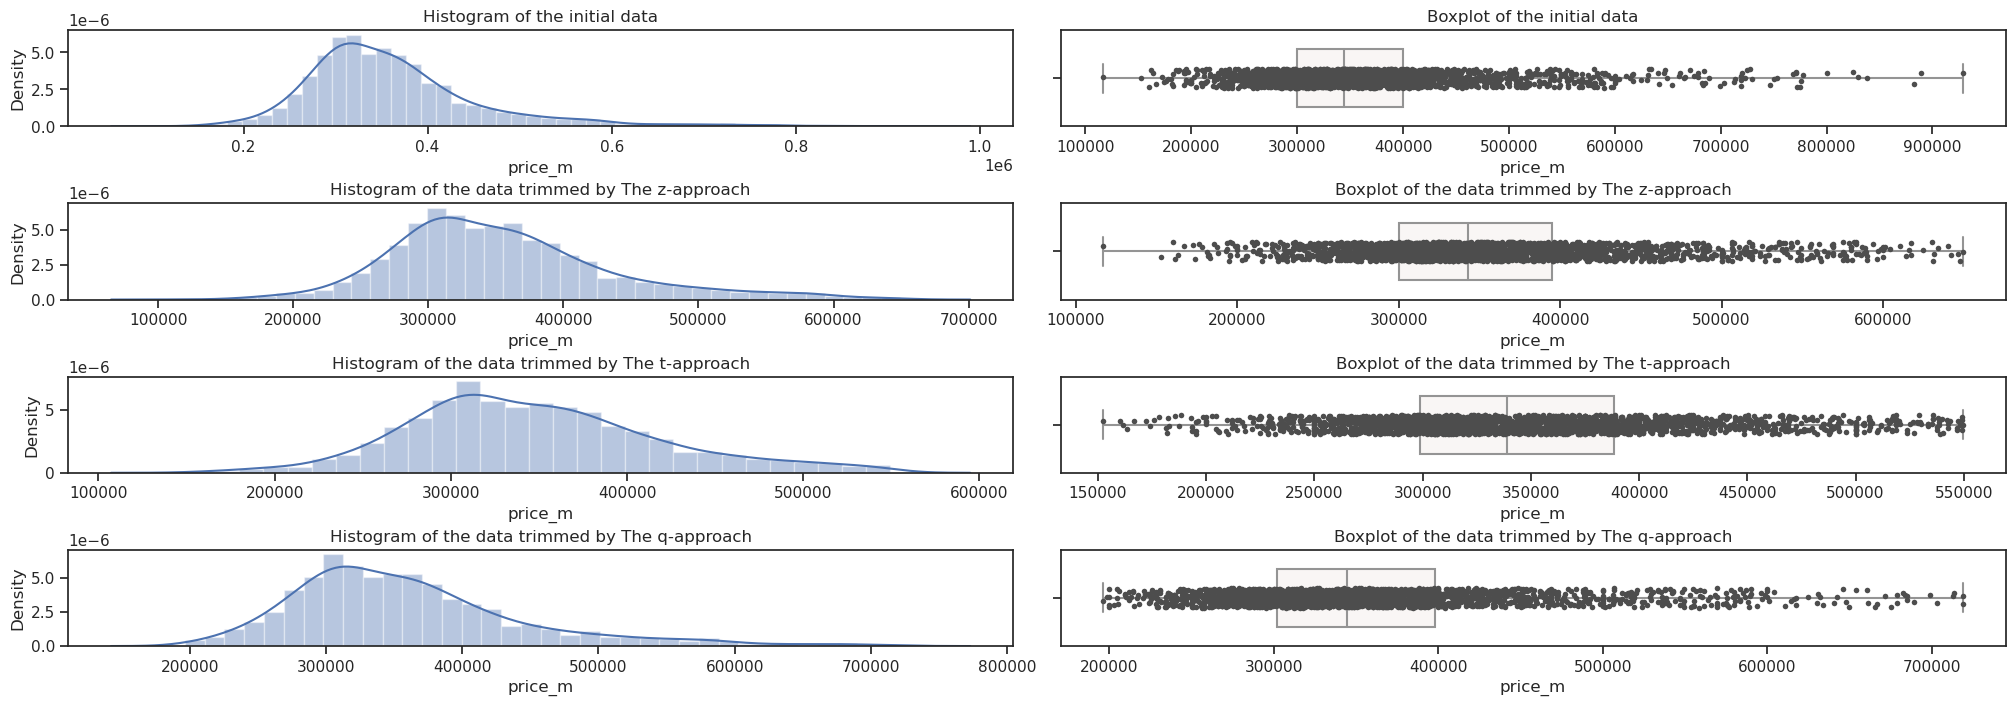

In [46]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(25,8))
plt.subplots_adjust(wspace=0.05,
                    hspace=0.8)
ax1 = plt.subplot(4,2,1)
sns.distplot(almatyApts['price_m'])
ax2 = plt.subplot(4,2,2)
sns.boxplot(data=almatyApts, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax3 = plt.subplot(4,2,3)
sns.distplot(almatyAptsZTrim['price_m'])
ax4 = plt.subplot(4,2,4)
sns.boxplot(data=almatyAptsZTrim, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyAptsZTrim, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax5 = plt.subplot(4,2,5)
sns.distplot(almatyAptsTTrim['price_m'])
ax6 = plt.subplot(4,2,6)
sns.boxplot(data=almatyAptsTTrim, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyAptsTTrim, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax7 = plt.subplot(4,2,7)
sns.distplot(almatyAptsQTrim['price_m'])
ax8 = plt.subplot(4,2,8)
sns.boxplot(data=almatyAptsQTrim, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyAptsQTrim, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax1.title.set_text('Histogram of the initial data')
ax2.title.set_text('Boxplot of the initial data')
ax3.title.set_text('Histogram of the data trimmed by The z-approach')
ax4.title.set_text('Boxplot of the data trimmed by The z-approach')
ax5.title.set_text('Histogram of the data trimmed by The t-approach')
ax6.title.set_text('Boxplot of the data trimmed by The t-approach')
ax7.title.set_text('Histogram of the data trimmed by The q-approach')
ax8.title.set_text('Boxplot of the data trimmed by The q-approach')
plt.show()

**Winsorization**

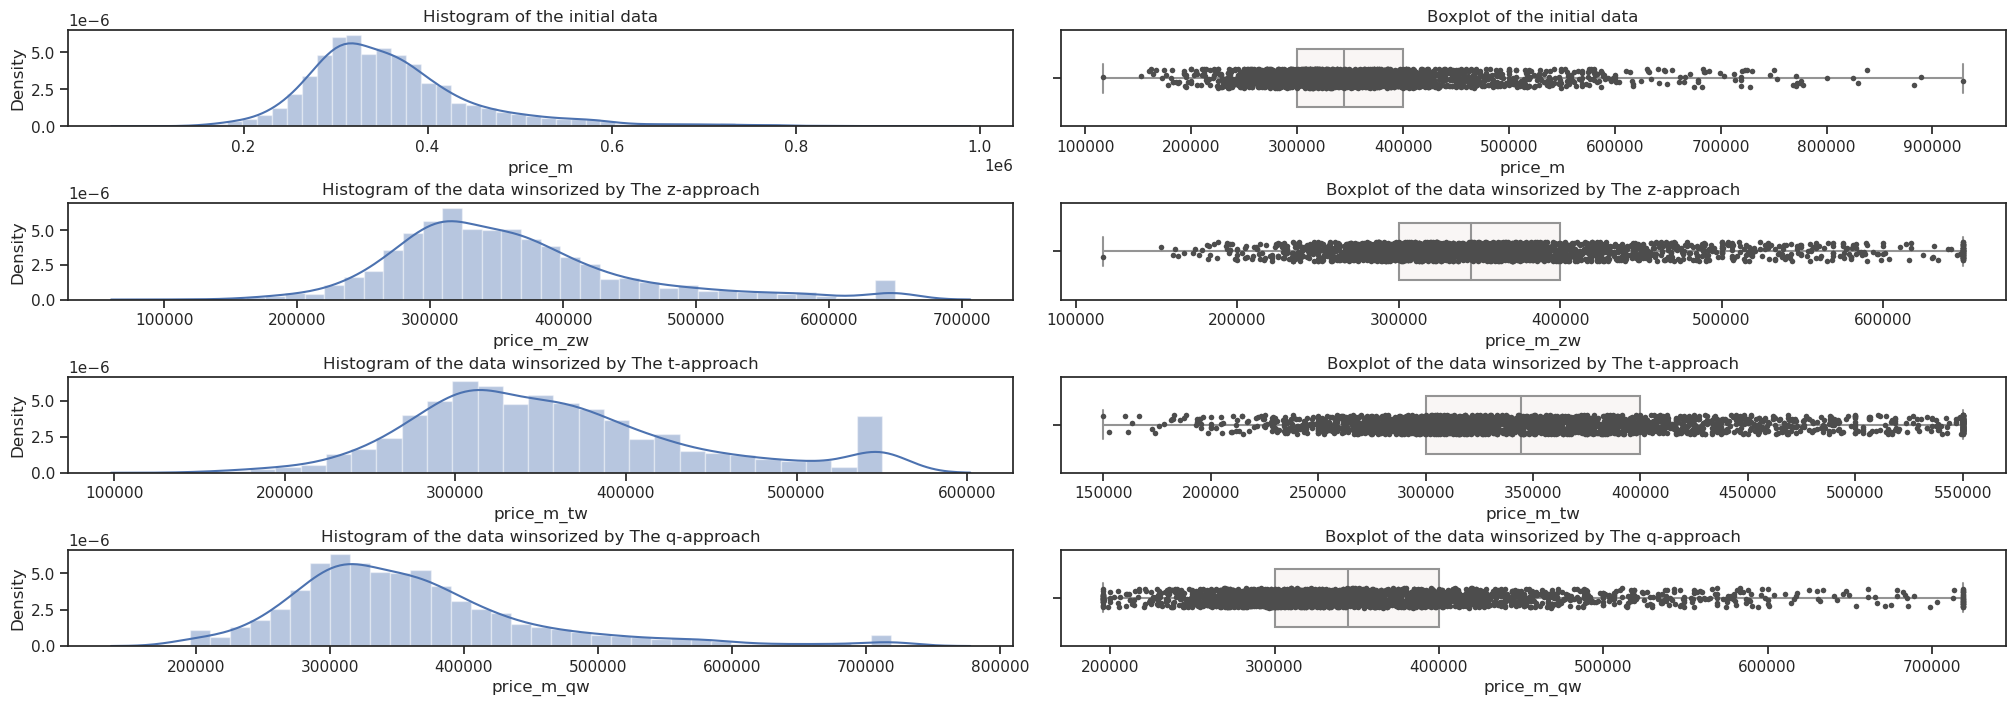

In [47]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(25,8))
plt.subplots_adjust(wspace=0.05,
                    hspace=0.8)
ax1 = plt.subplot(4,2,1)
sns.distplot(almatyApts['price_m'])
ax2 = plt.subplot(4,2,2)
sns.boxplot(data=almatyApts, x = 'price_m', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m',
              size=4, color=".3", linewidth=0)
ax3 = plt.subplot(4,2,3)
sns.distplot(almatyApts['price_m_zw'])
ax4 = plt.subplot(4,2,4)
sns.boxplot(data=almatyApts, x = 'price_m_zw', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m_zw',
              size=4, color=".3", linewidth=0)
ax5 = plt.subplot(4,2,5)
sns.distplot(almatyApts['price_m_tw'])
ax6 = plt.subplot(4,2,6)
sns.boxplot(data=almatyApts, x = 'price_m_tw', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m_tw',
              size=4, color=".3", linewidth=0)
ax7 = plt.subplot(4,2,7)
sns.distplot(almatyApts['price_m_qw'])
ax8 = plt.subplot(4,2,8)
sns.boxplot(data=almatyApts, x = 'price_m_qw', whis=[0, 100],
            width=.6, palette="vlag", orient='h')
sns.stripplot(data=almatyApts, x = 'price_m_qw',
              size=4, color=".3", linewidth=0)
ax1.title.set_text('Histogram of the initial data')
ax2.title.set_text('Boxplot of the initial data')
ax3.title.set_text('Histogram of the data winsorized by The z-approach')
ax4.title.set_text('Boxplot of the data winsorized by The z-approach')
ax5.title.set_text('Histogram of the data winsorized by The t-approach')
ax6.title.set_text('Boxplot of the data winsorized by The t-approach')
ax7.title.set_text('Histogram of the data winsorized by The q-approach')
ax8.title.set_text('Boxplot of the data winsorized by The q-approach')
plt.show()

## Afterword
We have considered the basic issues of handling outliers by tools of the Python language. I hope that this article will be useful for the appraisers who want to apply contemporary methods of valuation using machine learning and statistics.  Future comes. The future of valuation lies in the application of the Artificial Intelligence practices. If you need for any clarification, do not hesitate to __[contact me](https://www.facebook.com/murashev.kirill)__. And also join __[my community on Facebook](https://www.facebook.com/groups/1977067932456703)__ as well as __[my channel in Telegram](https://t.me/AIinValuation)__.